<a href="https://colab.research.google.com/github/ckhamitkar/PythonCode/blob/main/Copy_of_EasyVisa_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installation
# Install necessary libraries with specified versions. The '-q' flag means quiet installation.
# '--user' installs packages into the user's home directory.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

# Global Configurations & Warnings
# Import the warnings module to manage warnings.
import warnings
# Filter out all warnings to ensure cleaner output.
warnings.filterwarnings("ignore")

# Import pandas for data manipulation and analysis.
import pandas as pd
# Set pandas option to display all columns without truncation.
pd.set_option("display.max_columns", None)
# Set pandas option to display up to 100 rows without truncation.
pd.set_option("display.max_rows", 100)

  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Import numpy for numerical operations, especially array manipulation.
import numpy as np
# Import matplotlib.pyplot for plotting and visualization.
import matplotlib.pyplot as plt
# Import seaborn for advanced statistical data visualization.
import seaborn as sns

In [ ]:
# Import train_test_split for splitting data into training and testing sets.
# Import StratifiedKFold for stratified cross-validation.
# Import cross_val_score for evaluating model performance using cross-validation.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Import SMOTE for oversampling to handle imbalanced datasets.
from imblearn.over_sampling import SMOTE
# Import RandomUnderSampler for undersampling to handle imbalanced datasets.
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Import DecisionTreeClassifier for building a Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
# Import various ensemble classifiers for building robust models.
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
# Import XGBClassifier for Extreme Gradient Boosting.
from xgboost import XGBClassifier

In [ ]:
# Hyperparameter Tuning
# Import RandomizedSearchCV for hyperparameter tuning using random search.
from sklearn.model_selection import RandomizedSearchCV

# Metrics
# Import sklearn.metrics for various model evaluation metrics.
from sklearn import metrics
# Import specific metrics for evaluating classification model performance.
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [ ]:
from scipy.stats import zscore

## Import Dataset

In [ ]:
# Import drive from google.colab to mount Google Drive.
from google.colab import drive
# Mount Google Drive to access files stored there.
drive.mount('/content/drive')
# Read the CSV file into a pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project_Human_Resources/EasyVisa.csv')
# Create a copy of the original DataFrame for backup or later use.
datacopy = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# Display the first 5 rows of the DataFrame to get an initial look at the data.
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Display the last 5 rows of the DataFrame.
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
# Display the number of rows and columns in the DataFrame.
df.shape

(25480, 12)

There are 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [ ]:
# Display a concise summary of the DataFrame, including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
# Display descriptive statistics for all columns (including object type columns).
df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [ ]:
print("Number of entries with negative 'no_of_employees' before correction:", df[df['no_of_employees'] < 0].shape[0])
# Store the rows with negative 'no_of_employees' before correction
df_negative_employees = df[df['no_of_employees'] < 0]

# Convert negative values in 'no_of_employees' to their absolute value.
df['no_of_employees'] = df['no_of_employees'].abs()

# Check if any negative values remain after the operation.
print("Number of entries with negative 'no_of_employees' after correction:", df[df['no_of_employees'] < 0].shape[0])

# Display the rows that originally had negative values (for verification).
if not df_negative_employees.empty:
    print("\nOriginal rows with negative 'no_of_employees' values:")
    print(df_negative_employees)

Number of entries with negative 'no_of_employees' before correction: 33
Number of entries with negative 'no_of_employees' after correction: 0

Original rows with negative 'no_of_employees' values:
         case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia            

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Selects all columns from the DataFrame `df` that have an object (string) data type.
cat_col = list(df.select_dtypes("object").columns)

# Loop through each categorical column to display the count of its unique values.
for column in cat_col:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("-" * 50) # Print a separator line for better readability.

Value counts for column: case_id
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
Value counts for column: continent
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: education_of_employee
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: has_job_experience
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: requires_job_training
req

In [ ]:
# The unique case_id does not add much value so dropping it
df.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create a figure with two subplots, sharing the x-axis.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    # Set a super title for the entire figure.
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    # Create a boxplot in the first subplot (ax_box2) to visualize central tendency and outliers.
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    # Create a histogram in the second subplot (ax_hist2) to visualize distribution.
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    # Add a vertical line for the mean of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    # Add a vertical line for the median of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show() # Display the plot

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # Get the total number of entries in the column.
    count = data[feature].nunique() # Get the number of unique categories.
    # Set figure size based on the number of unique categories or 'n'.
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15) # Rotate x-axis labels for better readability.
    # Set the title of the bar plot.
    plt.title(f'Distribution of {feature}', fontsize=16)
    # Create a countplot (bar plot) of the feature.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Add labels (percentages or counts) on top of each bar.
    for p in ax.patches:
        if perc == True:
            # Calculate and format the percentage for each bar.
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            # Get the count for each bar.
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Calculate x-coordinate for the label.
        y = p.get_height()  # Get height for the label.

        # Annotate the bar with the calculated label.
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # Display the plot

In [ ]:
def automated_univariate_analysis(df):
    # Initialize a list to store names of potential ID columns.
    potential_ids = []
    # Iterate through each column in the DataFrame.
    for col in df.columns:
        print(f"\n--- Analyzing Column: {col} ---")
        # Check if every row in the column has a unique value.
        if df[col].nunique() == len(df):
            print(f"Suggested columns to drop: {col}")
            potential_ids.append(col) # Add column to potential_ids list.
        else:
            # If the column is numeric and not identified as an ID column, perform histogram and boxplot.
            if pd.api.types.is_numeric_dtype(df[col]) and col not in potential_ids:
                histogram_boxplot(df, col)
                print(df[col].describe()) # Display descriptive statistics.

            # If the column is categorical and not identified as an ID column, perform labeled barplot.
            elif col not in potential_ids:
                labeled_barplot(df, col, perc=True) # Display barplot with percentages.
                print(df[col].value_counts(normalize=True) * 100) # Show category percentages.


--- Analyzing Column: continent ---


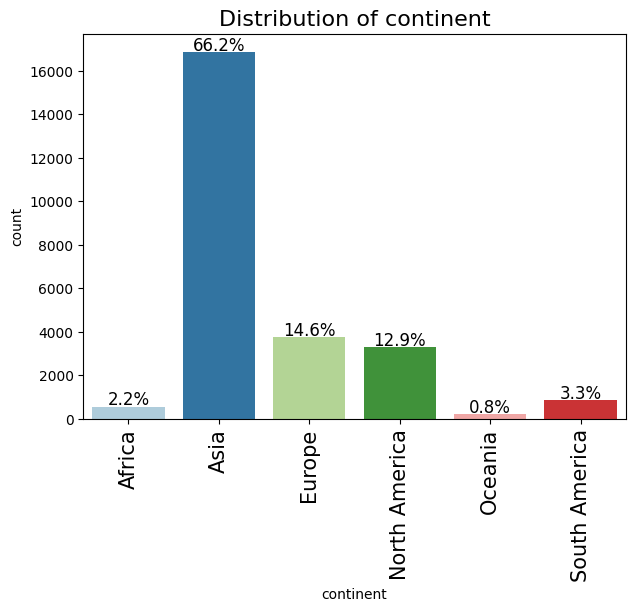

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

--- Analyzing Column: education_of_employee ---


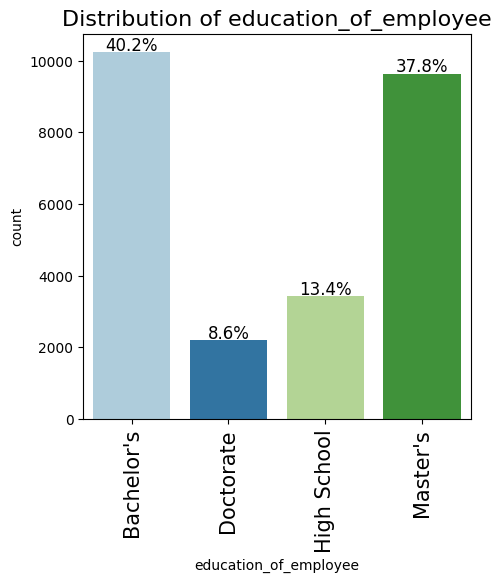

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

--- Analyzing Column: has_job_experience ---


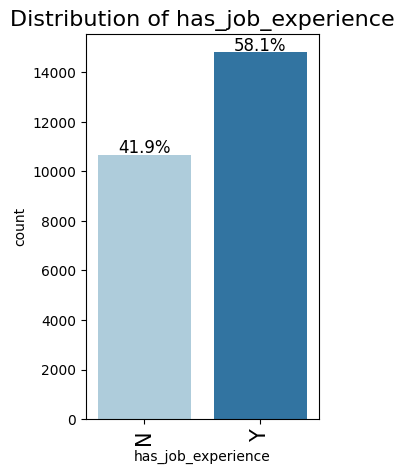

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

--- Analyzing Column: requires_job_training ---


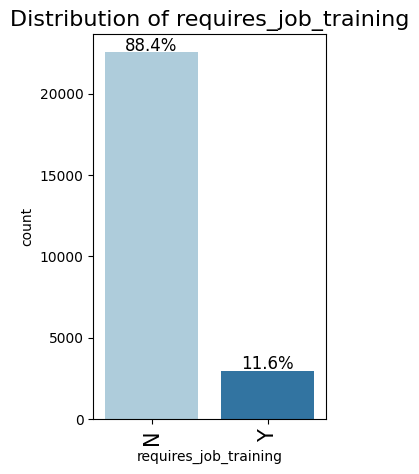

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

--- Analyzing Column: no_of_employees ---


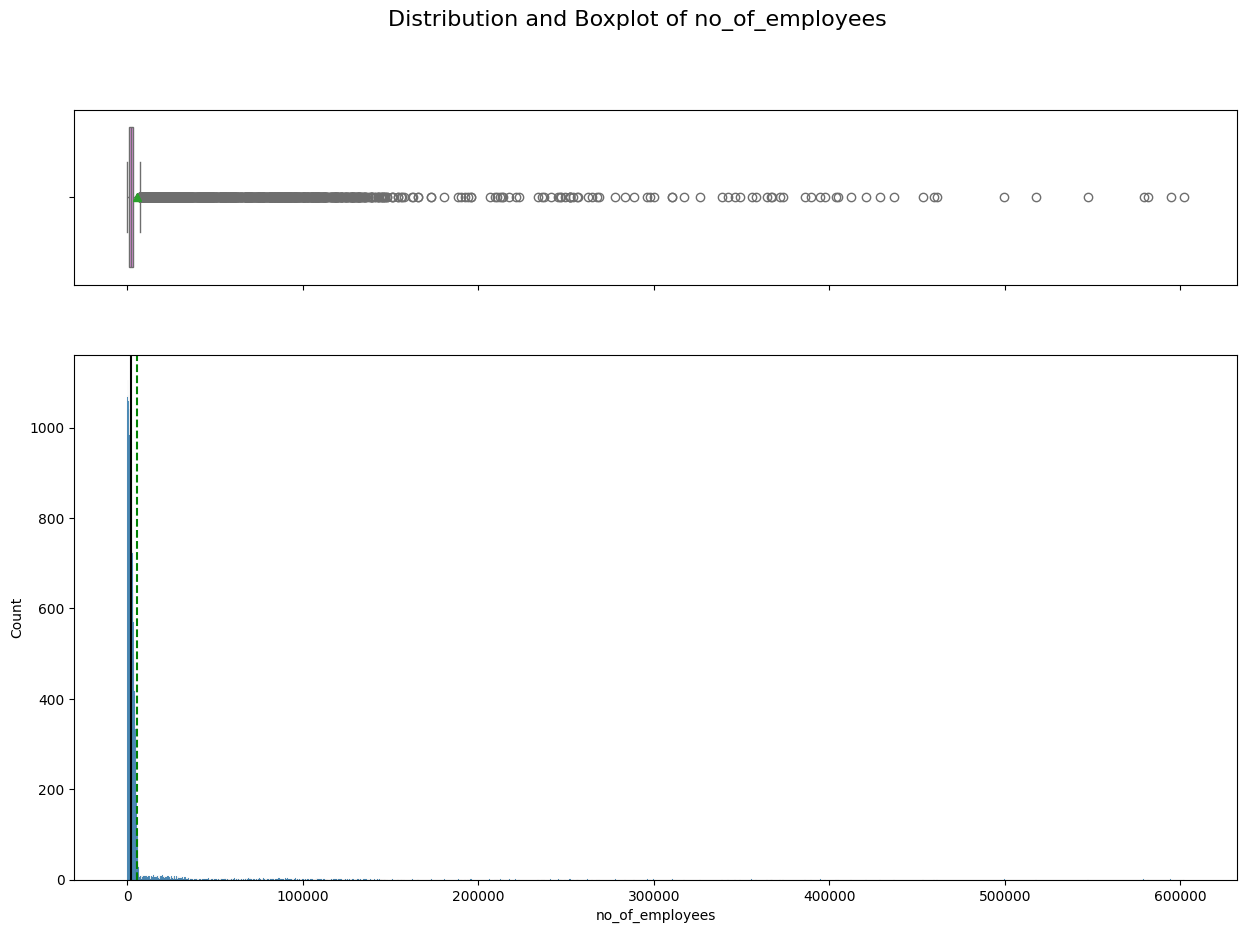

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

--- Analyzing Column: yr_of_estab ---


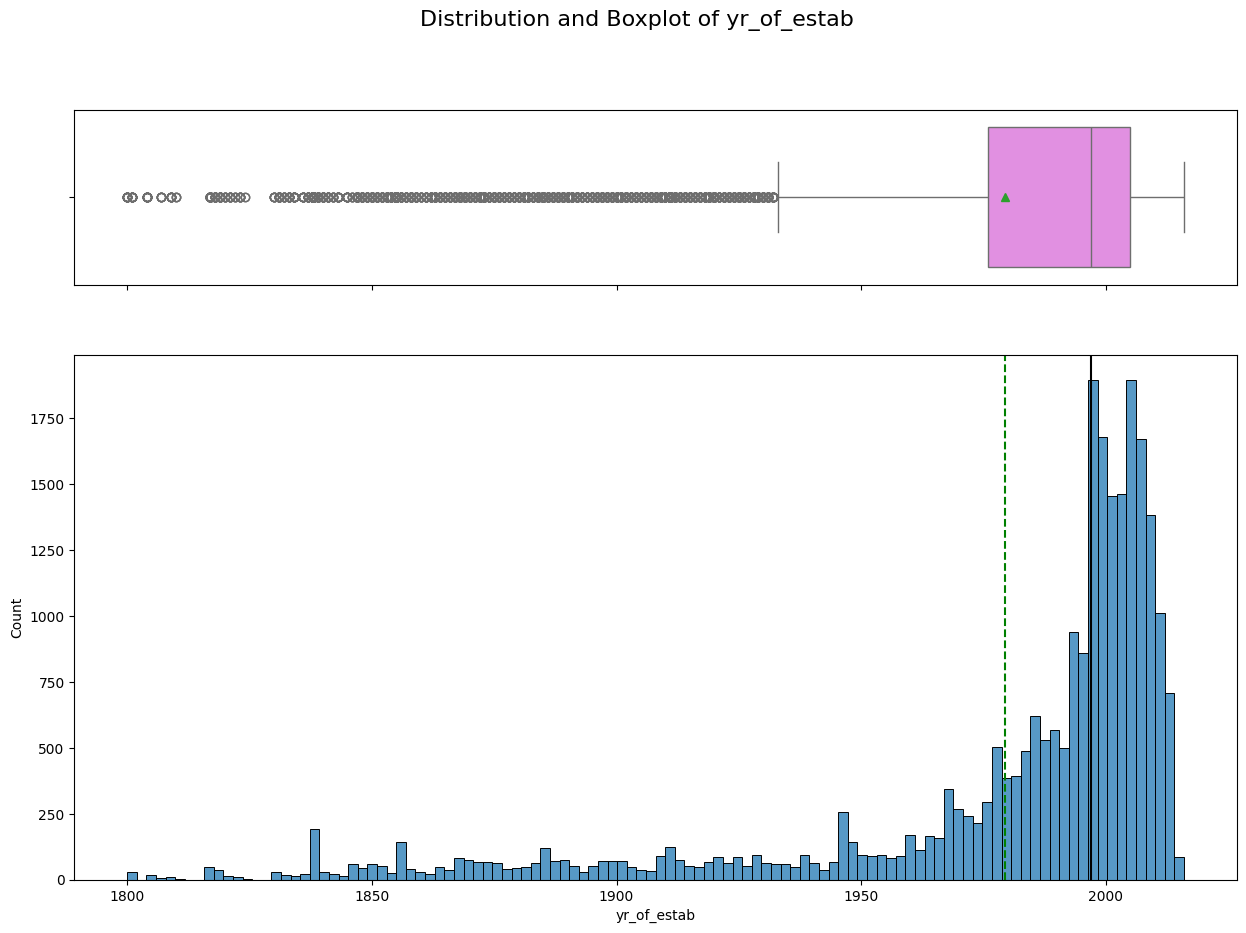

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

--- Analyzing Column: region_of_employment ---


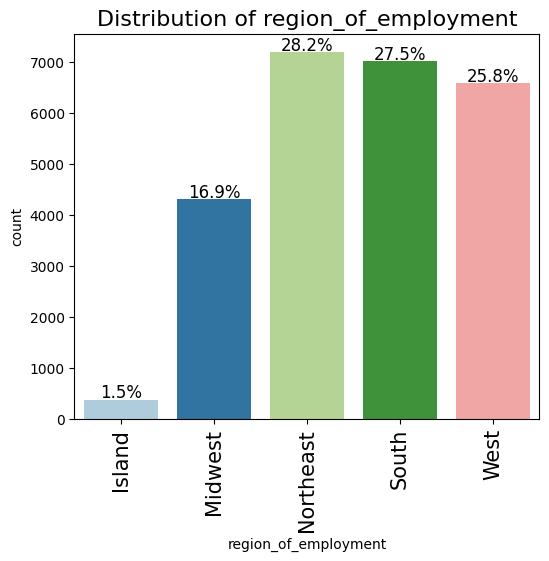

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64

--- Analyzing Column: prevailing_wage ---


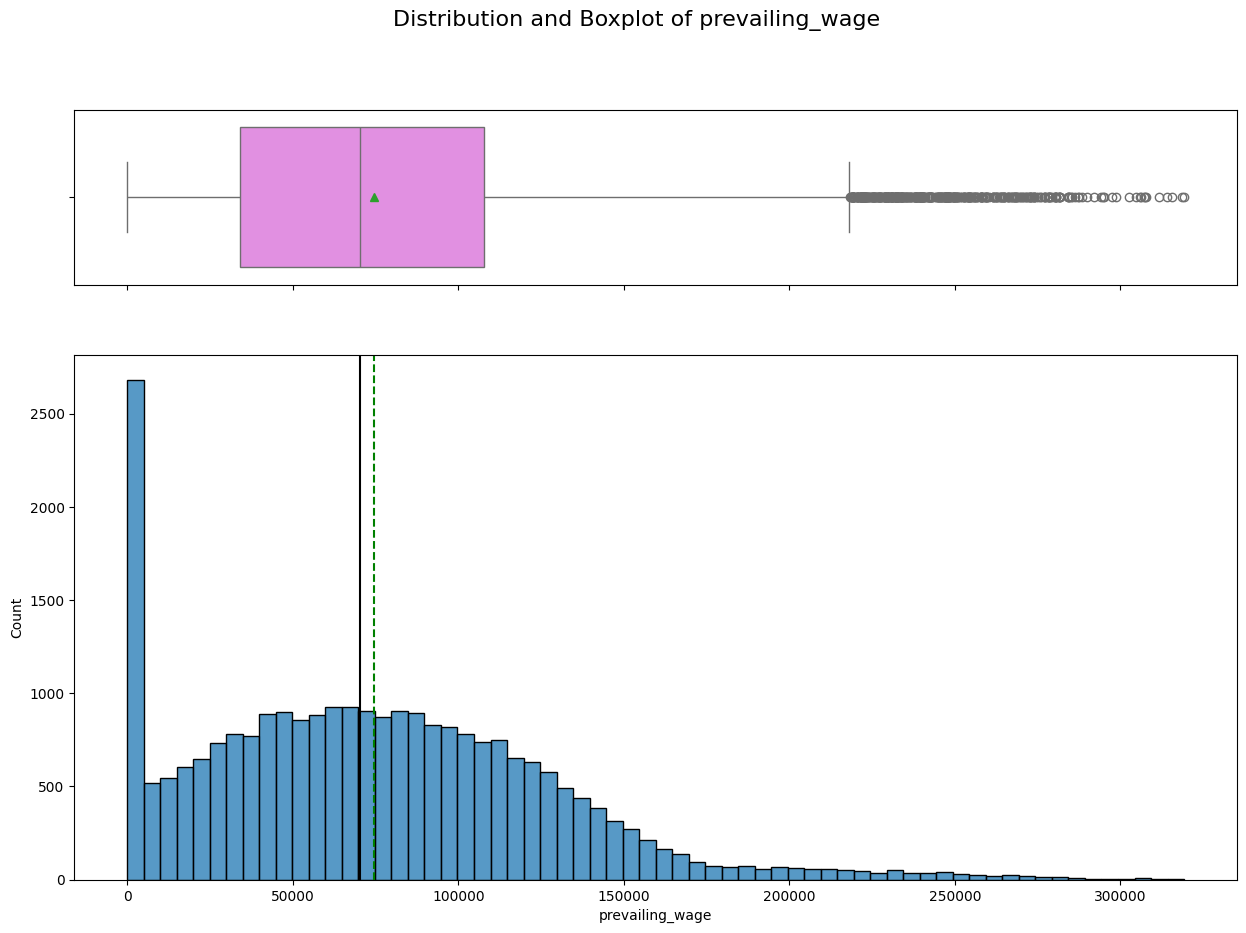

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

--- Analyzing Column: unit_of_wage ---


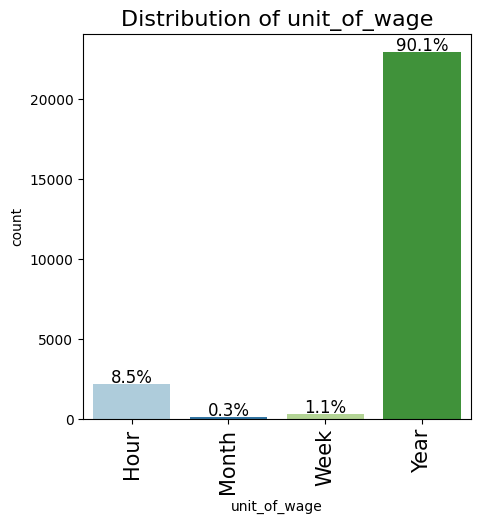

unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64

--- Analyzing Column: full_time_position ---


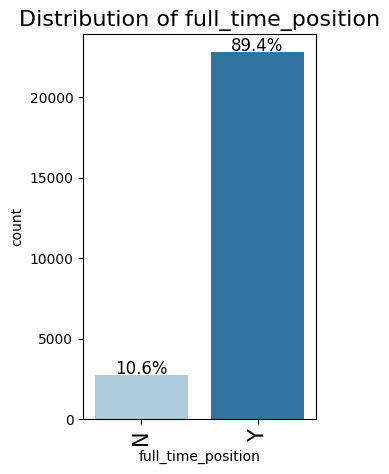

full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64

--- Analyzing Column: case_status ---


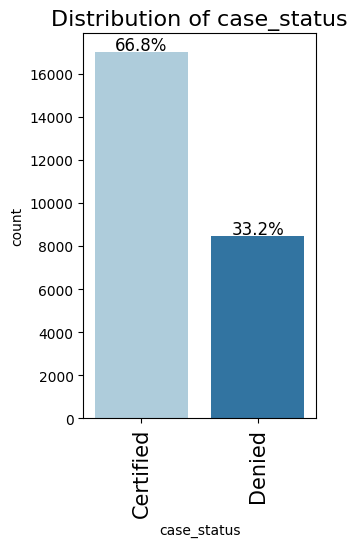

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64


In [ ]:
# Print the shape of the DataFrame.
df.shape
# Run the automated univariate analysis function on the DataFrame.
automated_univariate_analysis(df)

# Based on the analysis above we can make the following observations on each variable as seen below:

#### Observations on education of employee

**Education of Employee**
- *Dominant Groups*: There is a very high concentration of highly educated candidates. Over 77% of the applicants hold either a Bachelor's (40.2%) or a Master's (37.8%) degree.

- *Low Doctorate Representation*: Only about 8.6% have a Doctorate.

- *Implication*: Since the vast majority have at least a Bachelor's, the model might find that "Education" is a strong baseline requirement, but it may not be the primary "differentiator" for success unless comparing Doctorate vs. High School.

#### Observations on region of employment

**Region of Employment**

Balanced Spread:
- Employment is distributed fairly evenly across the Northeast (28.2%), South (27.5%), and West (25.8%).

The "Island" Outlier:
- The Island region represents a tiny fraction of the data (1.47%).

Implication:
- You have a very healthy representation of the three major US regions. However, with such a small sample size for "Island," the model might struggle to make accurate predictions for cases in that specific region due to lack of data.

#### Observations on job experience

**The Experienced Majority**

About 58% of applicants have previous job experience, while 42% do not.

Implication: This is a well-balanced feature. It’s a clean binary split that will likely be a significant "predictor" variable when you move to bivariate analysis (checking how experience affects case_status).

#### Observations on case status

**Case Status (Target Variable)**

Approval Rate:
- Approximately 66.8% of cases are Certified, while 33.2% are Denied.

Class Imbalance:
- While there are more "Certified" cases, a 2:1 ratio is generally considered a "mild" imbalance.

**Critical "Red Flag" Observation: no_of_employees**
Summary stats:

Min: 11

Max: 602,069

Mean vs. Median:
- The mean is 5,667 but the median (50%) is only 2,109.

Observation:
- This column is heavily right-skewed with massive outliers. Need to apply a Log Transformation to this column before feeding it into a model like a Decision Tree or Logistic Regression.

### Bivariate Analysis

In [ ]:
def plot_pairplot(df, target_col=None):
    """
    Generates a pairplot for numeric columns.
    target_col: The categorical column to use for color coding (hue).
    """
    print("Generating pairplot... this may take a moment.")
    # We use a subset of the data if the dataframe is huge to save time
    sample_size = min(len(df), 1000) # Limit sample size to 1000 for performance.

    # Generate a pairplot for numerical columns, colored by the target column.
    sns.pairplot(df.sample(sample_size), hue=target_col, palette='husl', corner=True)
    plt.show() # Display the plot.

In [ ]:
def plot_correlation_heatmap(df):
    # Set the figure size for the heatmap.
    plt.figure(figsize=(10, 8))
    # Calculate the correlation matrix for all numerical columns.
    corr = df.select_dtypes(include=[np.number]).corr()

    # Generate a mask for the upper triangle (to avoid duplicate information in the heatmap).
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Create a heatmap of the correlation matrix.
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Numerical Correlation Heatmap") # Set the title of the heatmap.
    plt.show() # Display the plot.

In [ ]:
# Check for cardinality and whitespace issues in object (categorical) columns.
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values") # Print the number of unique values.
    # Check if there are hidden spaces in the first element of the column (as a sample).
    if df[col].dtype == 'object':
        example = df[col].iloc[0]
        if str(example) != str(example).strip():
            print(f"!!! WARNING: Whitespace detected in {col}")

continent: 6 unique values
education_of_employee: 4 unique values
has_job_experience: 2 unique values
requires_job_training: 2 unique values
region_of_employment: 5 unique values
unit_of_wage: 4 unique values
full_time_position: 2 unique values
case_status: 2 unique values


Generating pairplot... this may take a moment.


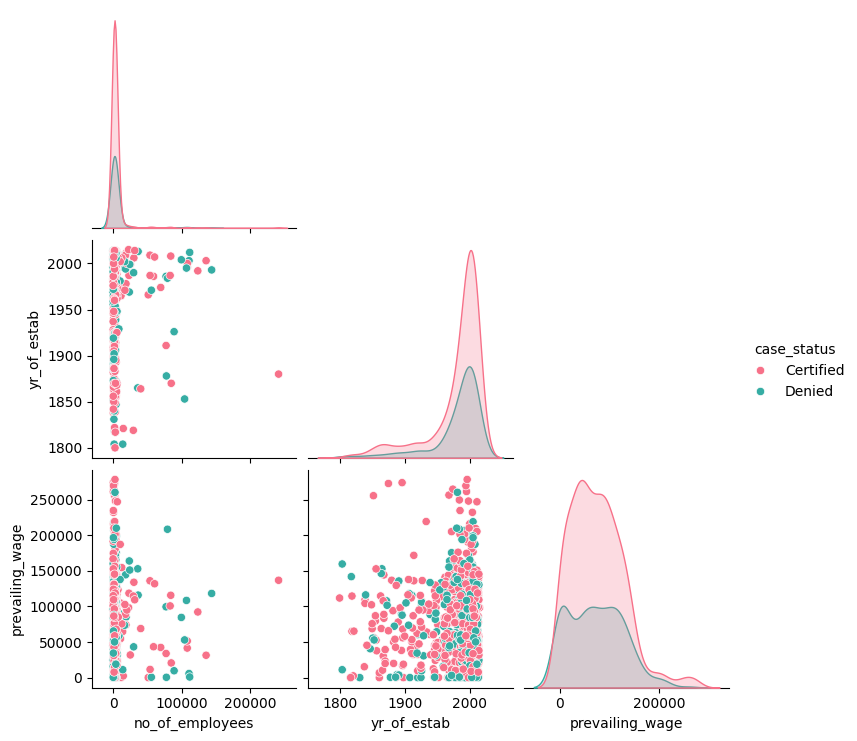

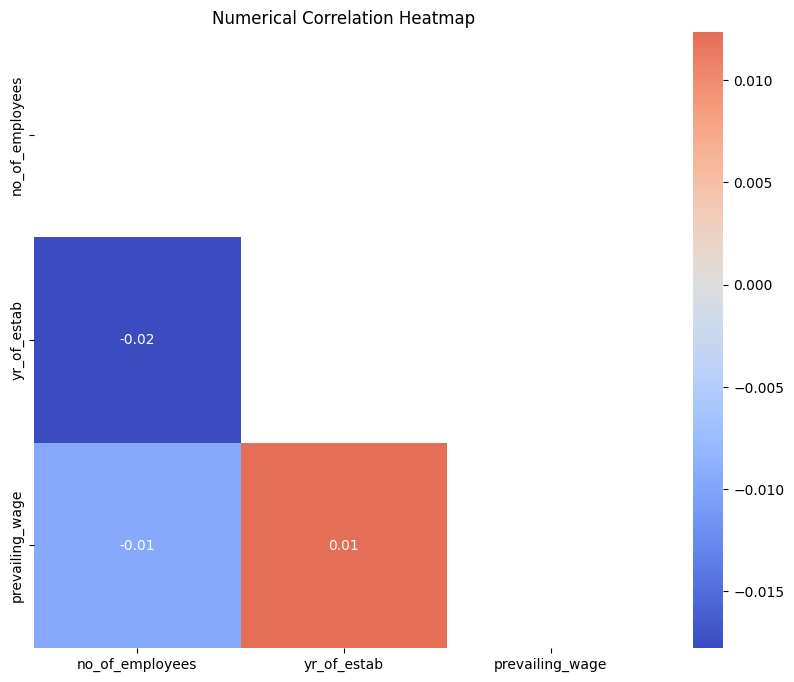

In [ ]:
# Generate a pairplot to visualize relationships between numerical features, colored by 'case_status'.
plot_pairplot(df, target_col='case_status')
# Generate a heatmap to visualize correlations between numerical features.
plot_correlation_heatmap(df)

**Creating functions for further analysis.**

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10)) # Create a 2x2 grid of subplots.

    target_uniq = data[target].unique() # Get unique values of the target variable.

    # Plot histogram for the first unique target value.
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Plot histogram for the second unique target value.
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Plot boxplot comparing the predictor against the target.
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Plot boxplot without outliers for a clearer view of central tendencies.
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout() # Adjust layout to prevent overlapping elements.
    plt.show() # Display the plot.

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique() # Get the number of unique categories in the predictor.
    sorter = data[target].value_counts().index[-1] # Determine sorting order based on target.
    # Create a crosstabulation table showing counts of predictor vs. target.
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    # Create a crosstabulation table showing normalized percentages.
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    # Plot a stacked bar chart.
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show() # Display the plot.

In [ ]:
# Create a copy so we don't overwrite the original labels if we still need them for plotting
df_encoded = df.copy()

# Map the target variable 'case_status' to numerical values (1 for Certified, 0 for Denied).
df_encoded['case_status'] = df_encoded['case_status'].map({'Certified': 1, 'Denied': 0})

# Optional: Encode other binary object columns to include them in the correlation matrix.
# Map 'has_job_experience' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['has_job_experience'] = df_encoded['has_job_experience'].map({'Y': 1, 'N': 0})
# Map 'requires_job_training' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['requires_job_training'] = df_encoded['requires_job_training'].map({'Y': 1, 'N': 0})
# Map 'full_time_position' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['full_time_position'] = df_encoded['full_time_position'].map({'Y': 1, 'N': 0})

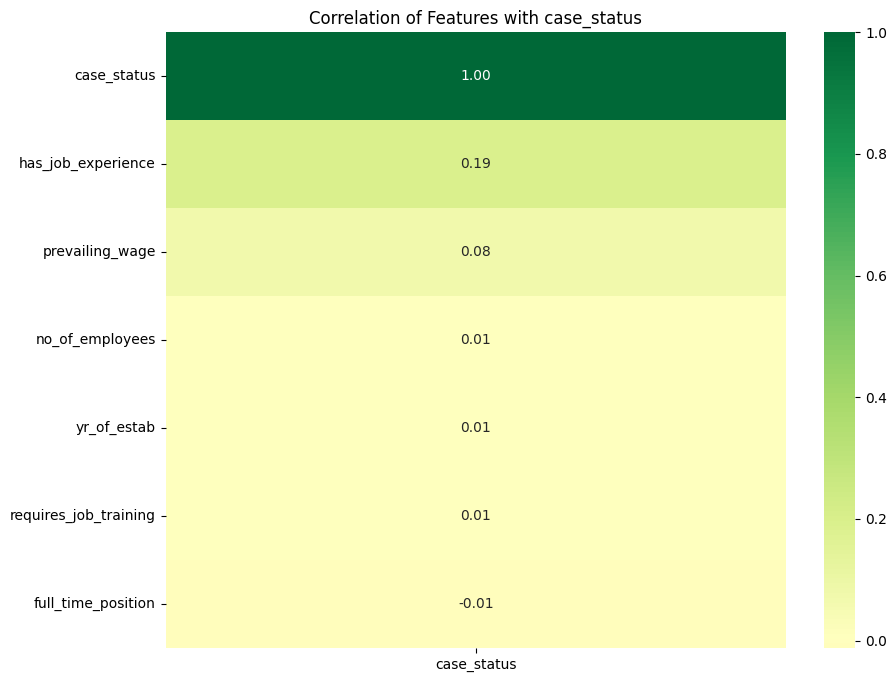

In [ ]:
def plot_target_correlation(df, target_col='case_status'):
    # Set the figure size for the heatmap.
    plt.figure(figsize=(10, 8))

    # Calculate correlation for all numeric types, including newly encoded binary columns.
    corr_matrix = df.select_dtypes(include=[np.number]).corr()

    # Sort the correlations with respect to the target column in descending order.
    target_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

    # Plotting a heatmap of feature correlations with the target variable.
    sns.heatmap(target_corr, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
    plt.title(f'Correlation of Features with {target_col}') # Set the title.
    plt.show() # Display the plot.

# Run the function to visualize correlations with 'case_status' using the encoded DataFrame.
plot_target_correlation(df_encoded)

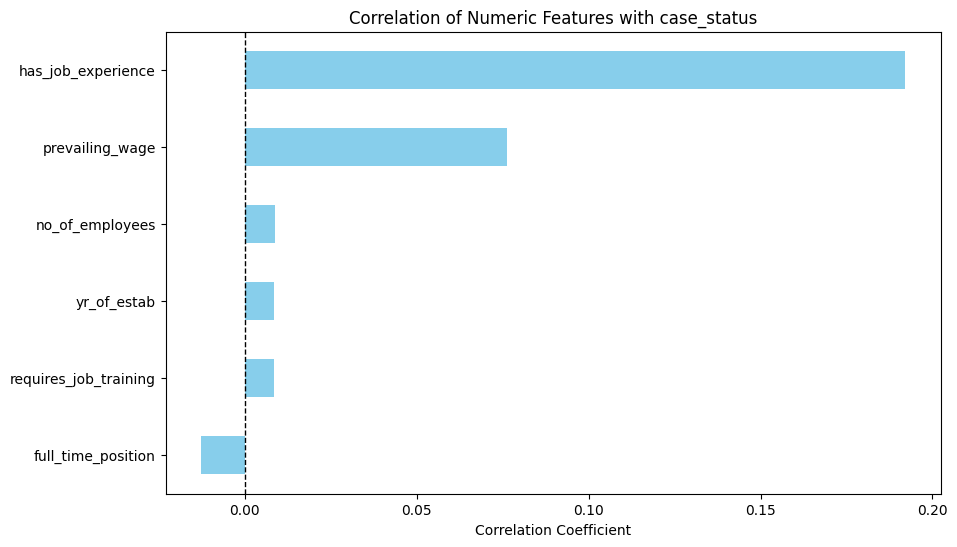

In [ ]:
def plot_correlation_bar(df, target_col='case_status'):
    # Calculate correlations of all numerical features with the target column, dropping the target itself.
    correlations = df.select_dtypes(include=[np.number]).corr()[target_col].drop(target_col)
    correlations = correlations.sort_values() # Sort correlations in ascending order.

    # Create a horizontal bar plot of correlations.
    correlations.plot(kind='barh', figsize=(10, 6), color='skyblue')
    plt.title(f'Correlation of Numeric Features with {target_col}') # Set the plot title.
    plt.xlabel('Correlation Coefficient') # Set the x-axis label.
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Add a vertical line at 0 for reference.
    plt.show() # Display the plot.

# Call the function to plot the correlation of numeric features with 'case_status'.
plot_correlation_bar(df_encoded)

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


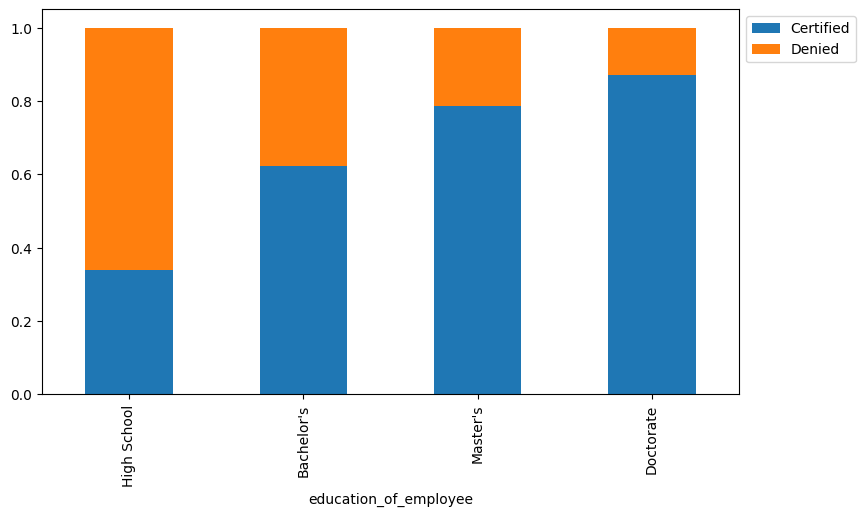

In [ ]:
# Plot a stacked bar chart to visualize how 'education_of_employee' influences 'case_status'.
stacked_barplot(df, 'education_of_employee', 'case_status')

# Does Higher Education Increase the Chances of Visa Certification?

## Dataset

| Education Level | Certified | Denied | Total |
|-----------------|-----------|--------|--------|
| High School     | 1164      | 2256   | 3420   |
| Bachelor's      | 6367      | 3867   | 10234  |
| Master's        | 7575      | 2059   | 9634   |
| Doctorate       | 1912      | 280    | 2192   |
| **All**         | 17018     | 8462   | 25480  |

---

## Certification Rate Calculation

[
{Certification Rate} = {Certified}/{Total} * 100
]

### Certification Rates by Education Level

| Education Level | Certification Rate |
|-----------------|-------------------|
| High School     | 34.04% |
| Bachelor's      | 62.21% |
| Master's        | 78.63% |
| Doctorate       | 87.23% |

---

## Observed Trend

There is a clear positive relationship between education level and visa certification rate:

- **High School:** More likely to be denied than certified.
- **Bachelor's Degree:** More likely to be certified than denied.
- **Master's Degree:** Strong majority certified.
- **Doctorate:** Very high certification probability.

Certification likelihood increases consistently as education level rises.

---

## Interpretation

The relationship between education level and visa certification appears:

- **Positive**
- **Strong**
- **Monotonic (consistently increasing)**

Higher educational attainment substantially increases the probability of visa certification for well-paid jobs abroad.

---

## Optional Statistical Insight

A chi-square test of independence could formally test whether the relationship between education level and certification status is statistically significant.

Additionally, odds ratios could quantify how much more likely advanced degree holders are to receive certification compared to lower education levels.

---

## Conclusion

Based on the data provided, higher education significantly increases the chances of visa certification. Doctorate holders have the highest approval rates, while High School applicants face the greatest likelihood of denial.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


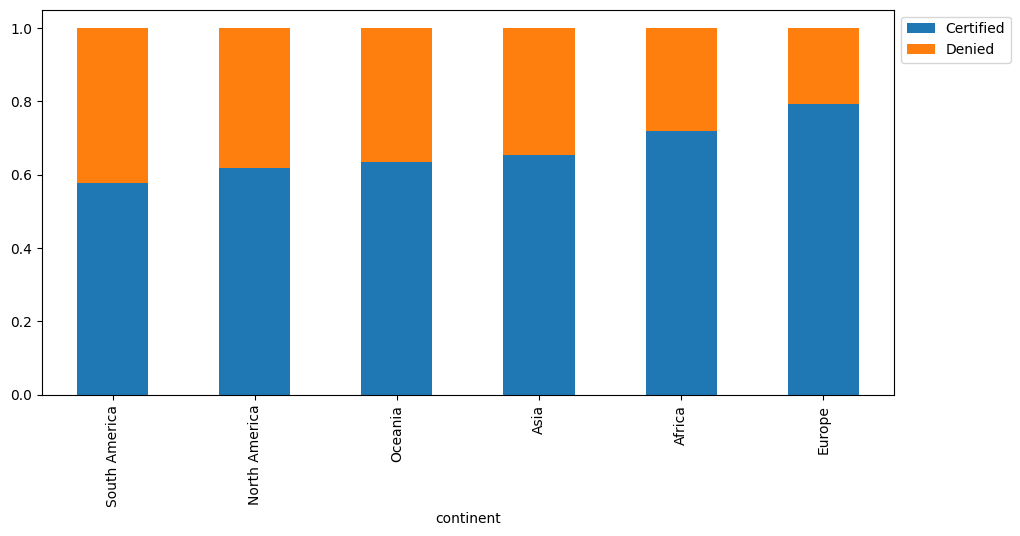

In [ ]:
# Plot a stacked bar chart to visualize how 'continent' influences 'case_status'.
stacked_barplot(df, 'continent', 'case_status')

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


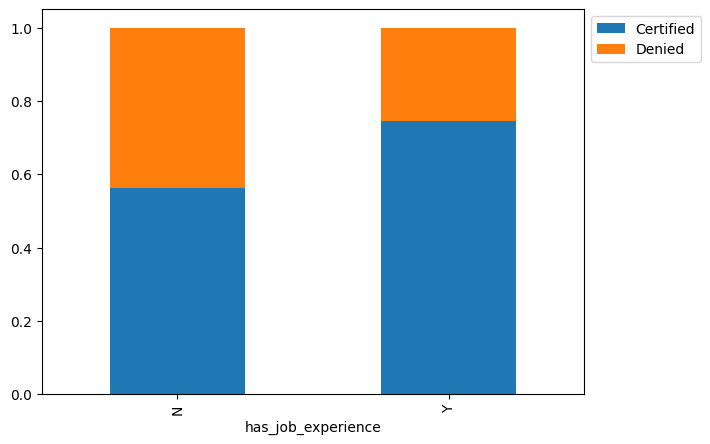

In [ ]:
# Plot a stacked bar chart to visualize how 'has_job_experience' influences 'case_status'.
stacked_barplot(df, 'has_job_experience', 'case_status')

#### Is the prevailing wage consistent across all regions of the US?

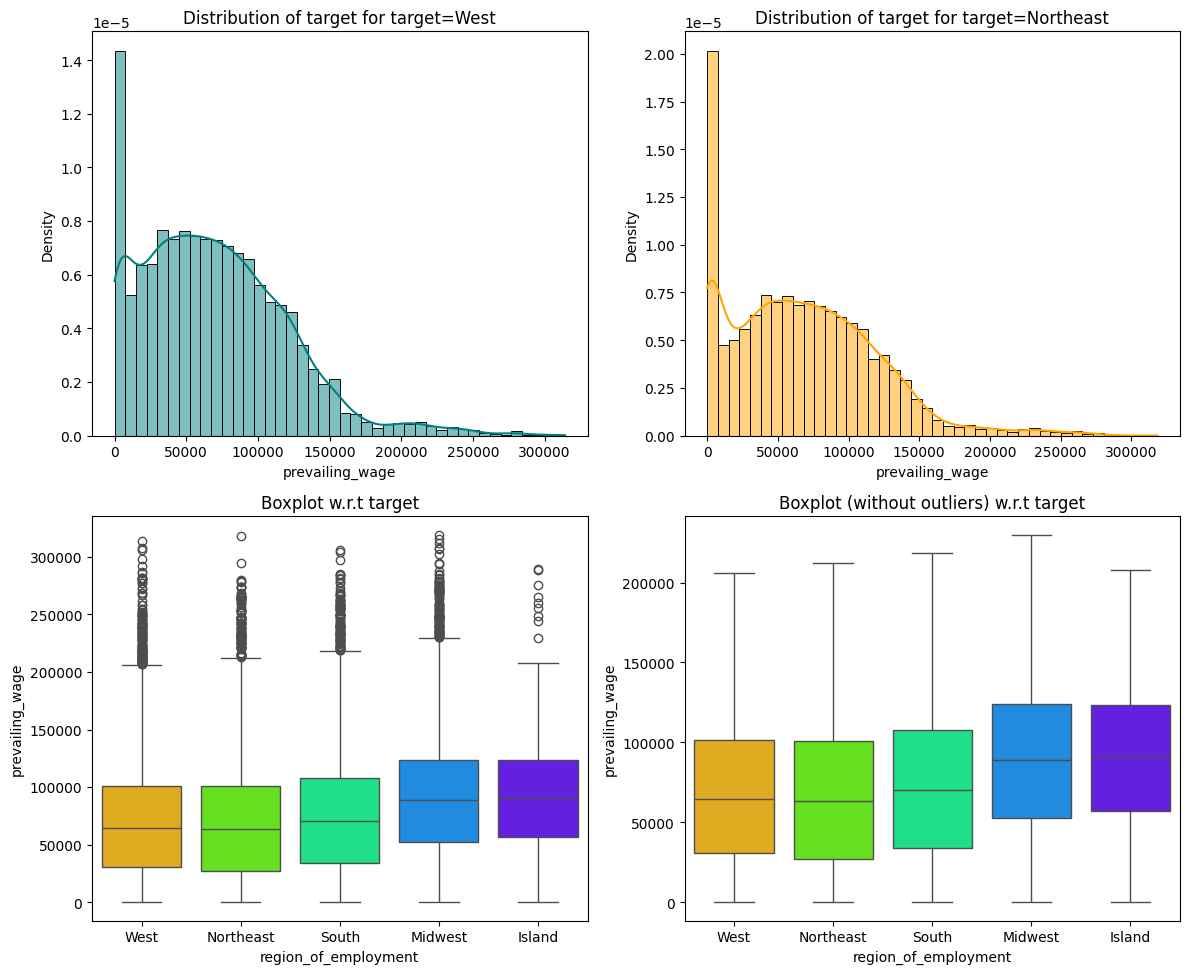

In [ ]:
# Plot the distribution of 'prevailing_wage' across different 'region_of_employment'.
distribution_plot_wrt_target(df, 'prevailing_wage', 'region_of_employment')

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

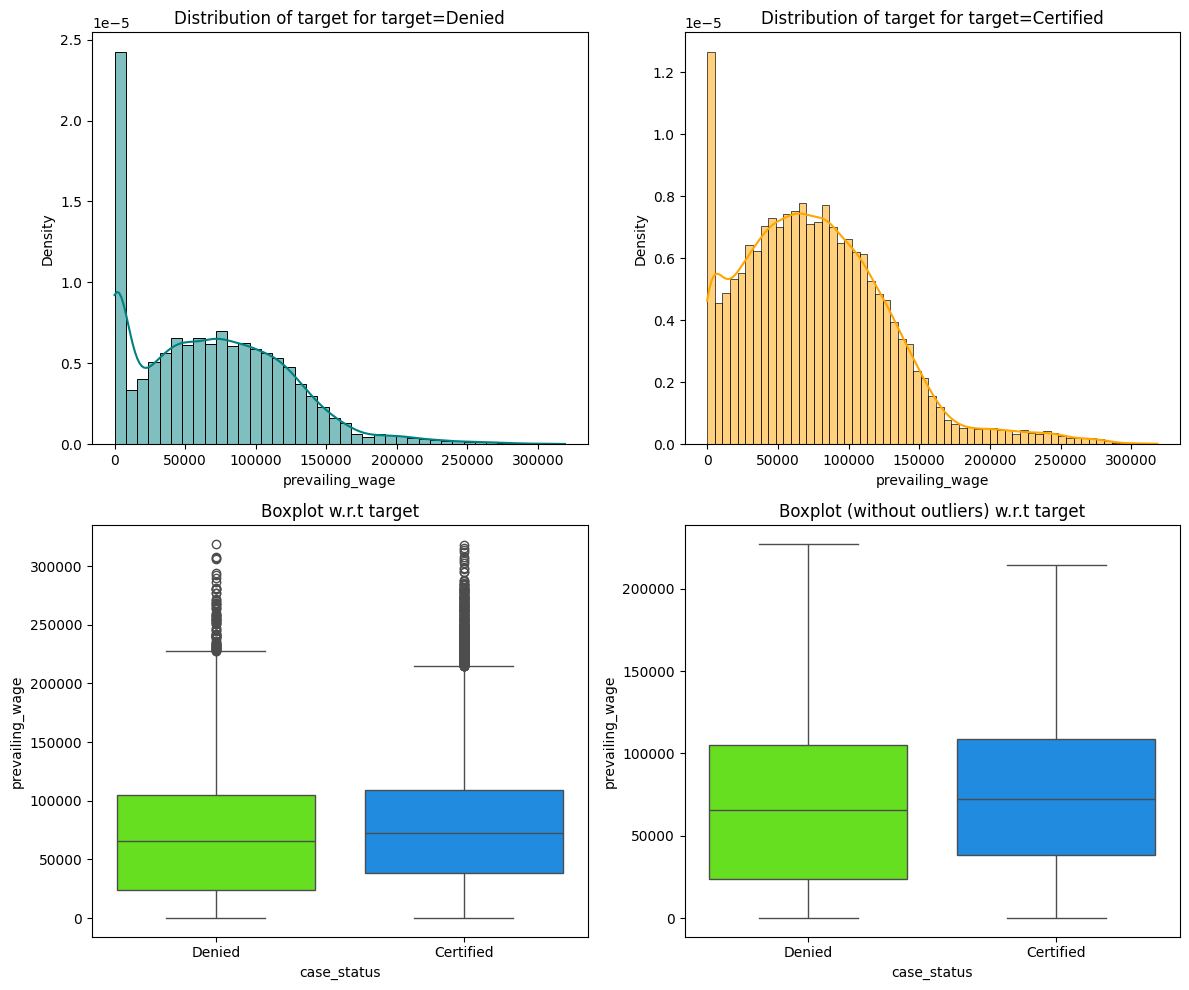

In [ ]:
# Plot the distribution of 'prevailing_wage' for each 'case_status'.
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

# Relationship Between Prevailing Wage and Visa Certification Status

## Objective

To examine whether visa certification status varies with changes in the prevailing wage set to protect both local talent and foreign workers.

---

## Visual Analysis

### 1. Distribution Comparison

The distribution plots of prevailing wage by case status (Certified vs. Denied) show:

- Both distributions are right-skewed.
- The Certified distribution is shifted to the right relative to the Denied distribution.
- Denied cases show greater density in lower wage ranges.
- Certified cases are more concentrated in mid-to-high wage ranges.

This suggests that higher prevailing wages are associated with a higher likelihood of certification.

---

### 2. Boxplot Analysis

#### With Outliers
- The median prevailing wage for Certified cases is higher than for Denied cases.
- Certified cases show a wider upper range with more high-wage outliers.

#### Without Outliers
- The median difference remains.
- The interquartile range (IQR) for Certified cases is positioned higher than for Denied cases.
- The relationship persists even after removing extreme values.

This indicates that the association is not driven solely by outliers.

---

## Interpretation

There is a clear positive relationship between prevailing wage and visa certification:

- Lower prevailing wages → Higher likelihood of denial.
- Higher prevailing wages → Higher likelihood of certification.

This pattern aligns with regulatory intent. Prevailing wage requirements are designed to:

- Protect domestic labor markets.
- Prevent wage suppression.
- Ensure foreign workers are compensated competitively.

Applications offering higher wages are more likely to meet compliance and scrutiny standards.

---

## Important Considerations

While the visual evidence suggests a strong association, this does not prove causation. Other variables may influence certification decisions, such as:

- Education level
- Job occupation
- Employer history
- Work experience
- Industry type

Further statistical testing (e.g., t-test, Mann–Whitney U test, or logistic regression) would be required to confirm statistical significance and control for confounding factors.

---

## Conclusion

Yes, visa certification status varies with prevailing wage.

Higher prevailing wages are consistently associated with a greater probability of certification. This relationship remains evident even after accounting for extreme wage values, suggesting a meaningful and robust association.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


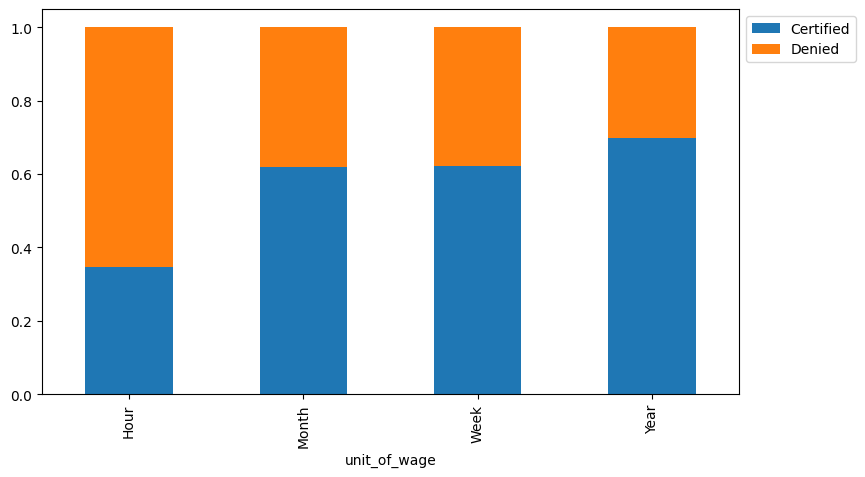

In [ ]:
# Plot a stacked bar chart to visualize how 'unit_of_wage' influences 'case_status'.
stacked_barplot(df, 'unit_of_wage', 'case_status')

In [ ]:
# This creates a separate column for every continent (continent_Asia, continent_Europe, etc.)
df_final = pd.get_dummies(df_encoded, columns=['continent', 'education_of_employee', 'region_of_employment'])

# Impact of Prevailing Wage Unit on Visa Certification

## Objective

To determine whether the unit of prevailing wage (e.g., Hourly, Weekly, Monthly, Yearly) influences the likelihood of visa certification.

---

## Correlation Analysis

From the feature correlation matrix:

- The correlation between `prevailing_wage` and `case_status` is **0.08**.
- Other related employment variables show very weak correlations (near 0).
- Stronger correlation is observed with `has_job_experience` (0.19), but still moderate.

A correlation value of **0.08** indicates a very weak positive relationship.

---

## Interpretation

If wage unit had a meaningful impact, we would expect:

- Noticeable correlation values
- Clear separation in distribution by case status
- Stronger predictive influence in modeling

However:

- The correlation is close to zero.
- This suggests wage unit type (Hourly vs Weekly vs Annual) does not meaningfully influence certification decisions.
- Certification decisions are more likely driven by actual wage level rather than the reporting unit.

This makes practical sense because:
- Wage units are typically standardized or converted during evaluation.
- Regulatory decisions focus on whether the wage meets prevailing wage requirements — not how it is expressed.

---

## Conclusion

There is no strong evidence that the unit of prevailing wage significantly impacts visa certification likelihood.

The actual wage amount appears to be more relevant than whether it is expressed hourly, weekly, monthly, or annually.

## Data Pre-processing

### Outlier Check

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create a figure with two subplots, sharing the x-axis.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    # Set a super title for the entire figure.
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    # Create a boxplot in the first subplot (ax_box2) to visualize central tendency and outliers.
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    # Create a histogram in the second subplot (ax_hist2) to visualize distribution.
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    # Add a vertical line for the mean of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    # Add a vertical line for the median of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show() # Display the plot

In [ ]:
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print("\n")

In [ ]:
def zscore_outliers(df, column, threshold=3):
    # Calculate the absolute Z-score for the column
    z_scores = np.abs(zscore(df[column]))

    # Identify outliers where the absolute Z-score is greater than the threshold
    outliers = df[z_scores > threshold]

    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Z-score threshold: {threshold}")
    print("\n")

Numerical columns identified for outlier detection: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
--- Analyzing Column: no_of_employees ---
count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64


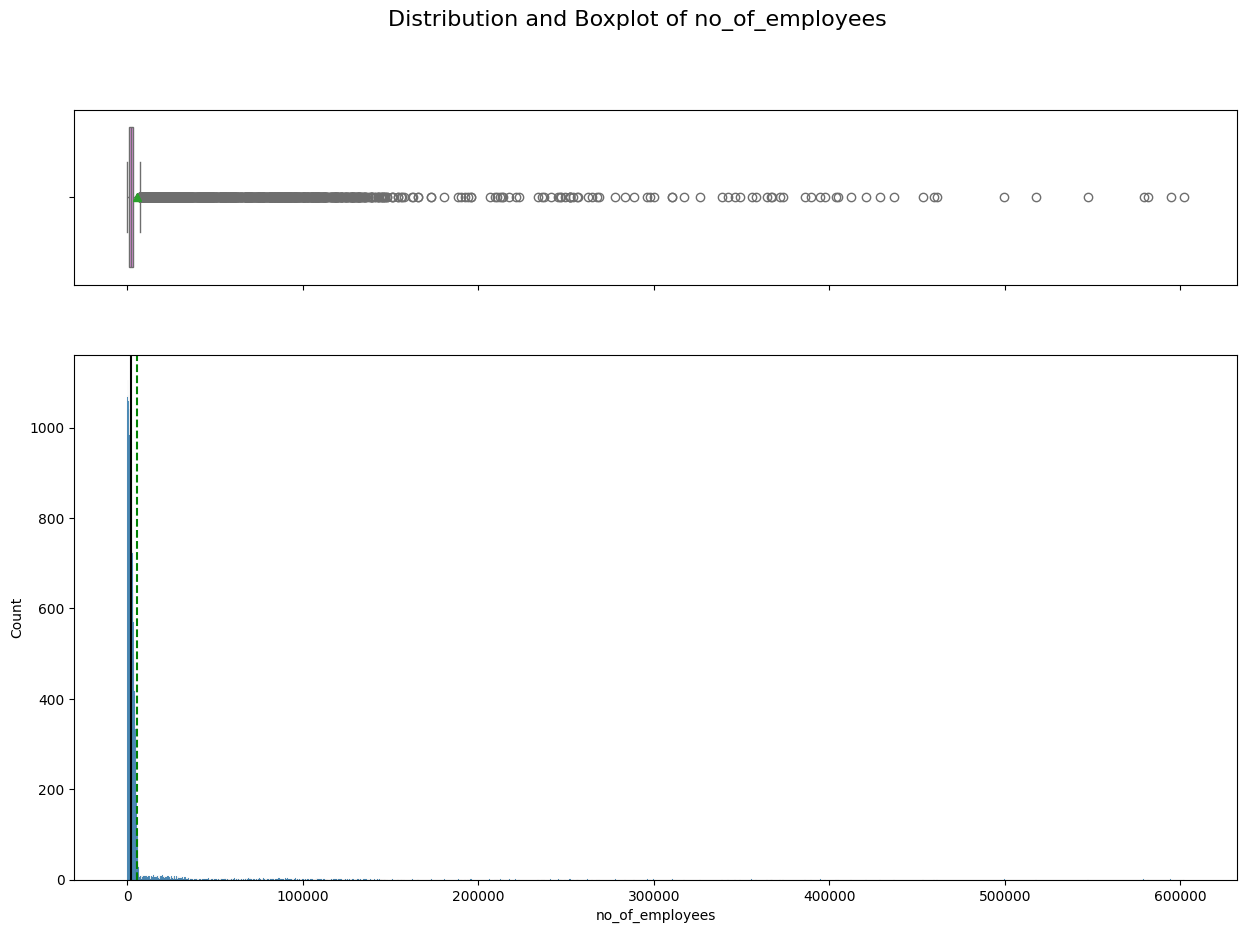

Column: no_of_employees
  Number of outliers: 1556
  Percentage of outliers: 6.11%
  Lower Bound: -2701.00, Upper Bound: 7227.00


Column: no_of_employees
  Number of outliers: 429
  Percentage of outliers: 1.68%
  Z-score threshold: 3


--- Analyzing Column: yr_of_estab ---
count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64


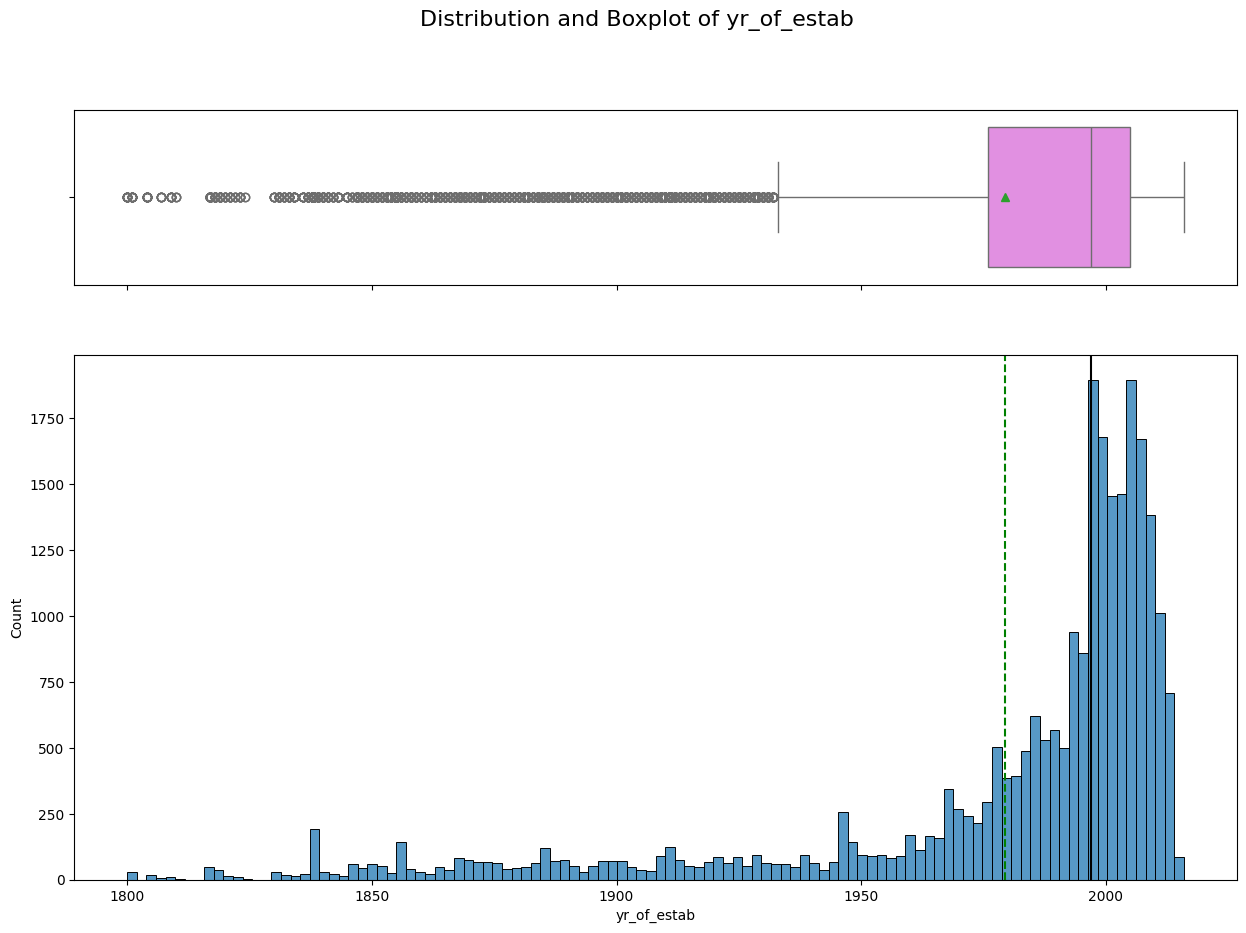

Column: yr_of_estab
  Number of outliers: 3260
  Percentage of outliers: 12.79%
  Lower Bound: 1932.50, Upper Bound: 2048.50


Column: yr_of_estab
  Number of outliers: 695
  Percentage of outliers: 2.73%
  Z-score threshold: 3


--- Analyzing Column: prevailing_wage ---
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


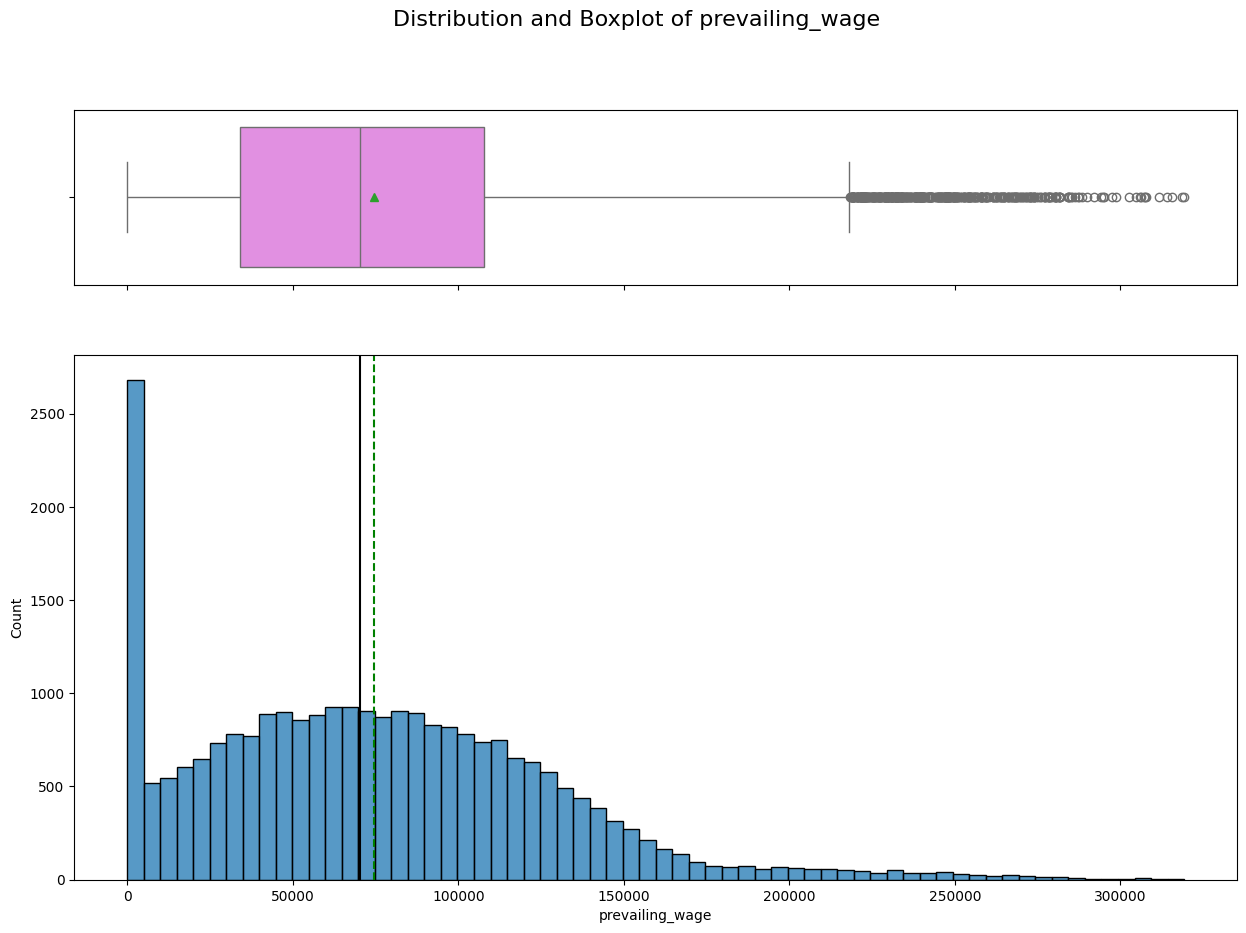

Column: prevailing_wage
  Number of outliers: 427
  Percentage of outliers: 1.68%
  Lower Bound: -76564.57, Upper Bound: 218315.56


Column: prevailing_wage
  Number of outliers: 294
  Percentage of outliers: 1.15%
  Z-score threshold: 3




In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for outlier detection: {numerical_cols}")
for col in numerical_cols:
    print(f"--- Analyzing Column: {col} ---")
    print(df[col].describe())
    histogram_boxplot(df, col)
    iqr_outliers(df, col)
    zscore_outliers(df, col)

### Observations on Outliers from Boxplots

**1. `no_of_employees`:**
- The boxplot for `no_of_employees` shows a significant number of outliers on the higher side. The median is around 2109, while the maximum value is 602,069, indicating a highly skewed distribution with many companies having a relatively small number of employees and a few companies having an extremely large number.
- The large difference between the 75th percentile (3504) and the maximum value confirms the presence of extreme outliers, suggesting that the majority of the data points are concentrated at the lower end.

**2. `yr_of_estab`:**
- The `yr_of_estab` boxplot indicates some outliers on the lower side, representing companies established much earlier than the majority.
- The 25th percentile is 1976 and the minimum is 1800, which means there are some companies established as far back as the 19th century, while most were established in the later half of the 20th century or early 21st century. These older establishment years could be considered outliers depending on the context, but they are not as extreme or sparse as those in `no_of_employees`.

**3. `prevailing_wage`:**
- The boxplot for `prevailing_wage` also displays a noticeable number of outliers on both the lower and higher ends, though more prominent on the higher end.
- The minimum wage is 2.14 and the maximum is 319,210.27, with a mean of 74,455.81 and a median of 70,308.21. This wide range and the presence of values far from the bulk of the data suggest both extremely low and extremely high prevailing wages as outliers.
- The distribution appears right-skewed, with the mean being higher than the median, and a significant spread towards higher wage values.

### Observations on Outliers from IQR Rule

**1. `no_of_employees`:**
- There are 1556 outliers detected, which is about 6.11% of the data. These are values above the upper bound of 7227.00 employees, indicating a presence of companies with significantly more employees than the majority. The negative lower bound (-2701.00) is not practically meaningful for employee count, so only upper outliers are relevant.

**2. `yr_of_estab`:**
- This column has 3260 outliers, accounting for 12.79% of the data. The lower bound is 1932.50 and the upper bound is 2048.50. This means companies established before 1932.50 or after 2048.50 are considered outliers. Given the data's maximum year is 2016, all these outliers are on the lower end (i.e., older companies), which aligns with the boxplot observation.

**3. `prevailing_wage`:**
- For `prevailing_wage`, 427 outliers (1.68%) were identified. The lower bound is -76564.57 and the upper bound is 218315.56. Similar to `no_of_employees`, the negative lower bound is not practically meaningful for wage. Outliers are primarily values significantly above the upper bound, indicating exceptionally high prevailing wages, though some values below the lower bound (if positive) would also be considered outliers. This confirms the right-skewness and high-end outliers seen in the boxplot.

### Observations on Outliers from Z-score Method

**1. `no_of_employees`:**
- Using a Z-score threshold of 3, 429 outliers (1.68%) were identified. This is significantly fewer than the 1556 outliers found by the IQR method. This difference suggests that while there are extreme values, fewer of them are beyond 3 standard deviations from the mean compared to 1.5 times the IQR, indicating that the Z-score method is more conservative in detecting outliers for this heavily skewed distribution.

**2. `yr_of_estab`:**
- The Z-score method identified 695 outliers (2.73%) for `yr_of_estab`. This is also fewer than the 3260 outliers found by the IQR method. This indicates that while there are older companies, fewer of them are more than 3 standard deviations away from the mean establishment year, compared to the IQR's broader definition of outliers.

**3. `prevailing_wage`:**
- For `prevailing_wage`, 294 outliers (1.15%) were detected, which is fewer than the 427 outliers identified by the IQR method. This again highlights the more conservative nature of the Z-score method. The outliers detected are those with exceptionally high (or low, though less likely due to the nature of the data and positive minimum value) wages that are more than 3 standard deviations away from the mean, consistent with the right-skewness observed in the boxplot.

### Outlier Handling

## Identify Numerical Columns
Extract all numerical columns from the DataFrame for outlier detection.


To identify all numerical columns in the DataFrame for outlier detection use `.select_dtypes(include=np.number)`



In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for outlier detection: {numerical_cols}")

Numerical columns identified for outlier detection: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


Identify and summarize outliers in the numerical columns of the `df` DataFrame (`no_of_employees`, `yr_of_estab`, and `prevailing_wage`) using boxplots, the Interquartile Range (IQR) rule, and the Z-score method.

In [ ]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
df['no_of_employees'] = df['no_of_employees'].abs()
# Extract numerical columns as originally intended
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for outlier detection: {numerical_cols}")

Numerical columns identified for outlier detection: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [ ]:
print(df.describe())
print(df.info())

       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.089207   1979.409929     74455.814592
std       22877.917453     42.366929     52815.942327
min          11.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-nul

## Outlier Detection with Boxplots

Generate a boxplot for each numerical column to visually inspect for outliers.


To visualize outliers in each numerical column iterate through the `numerical_cols` list and call the `histogram_boxplot` function for each column, as requested in the instructions.



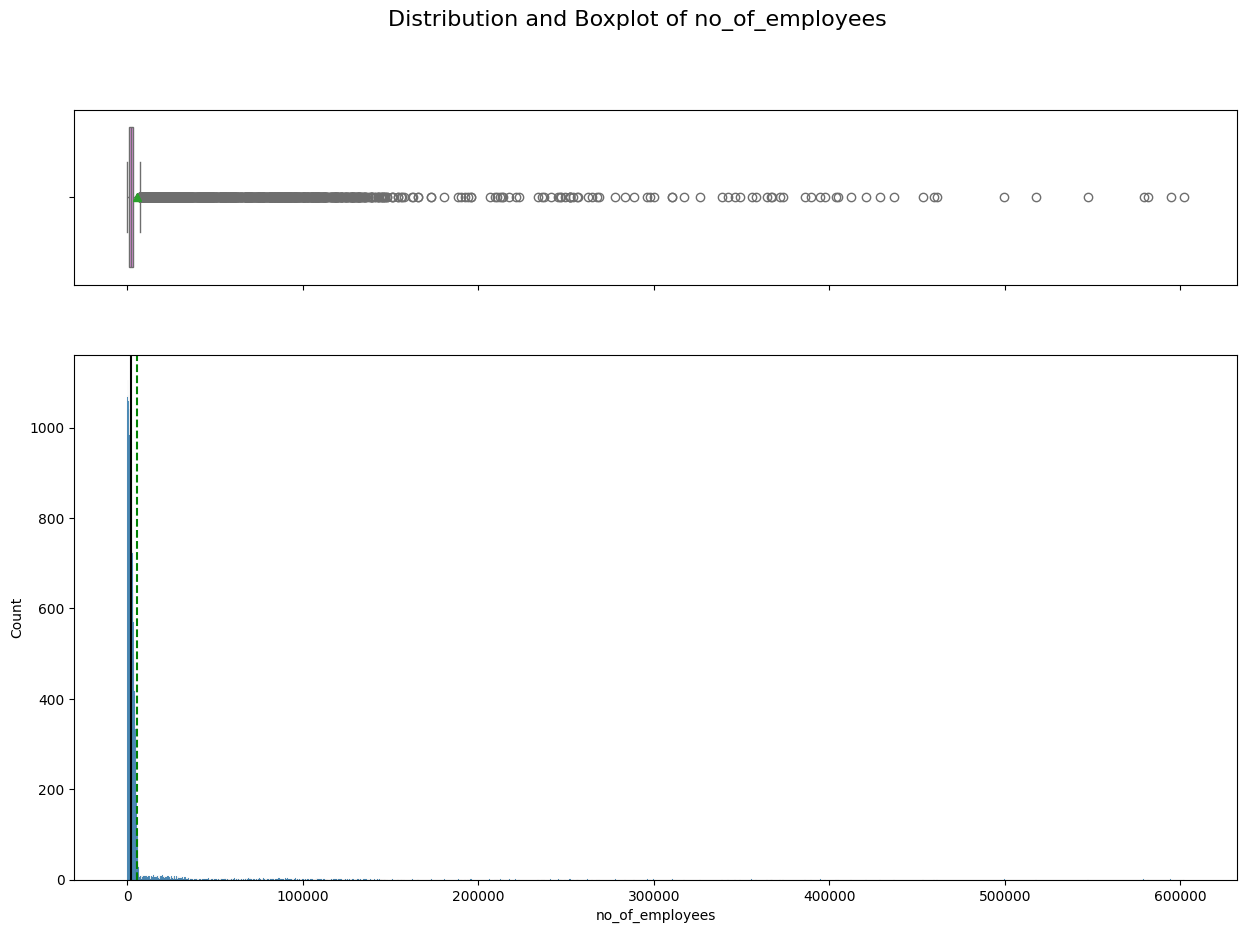

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64


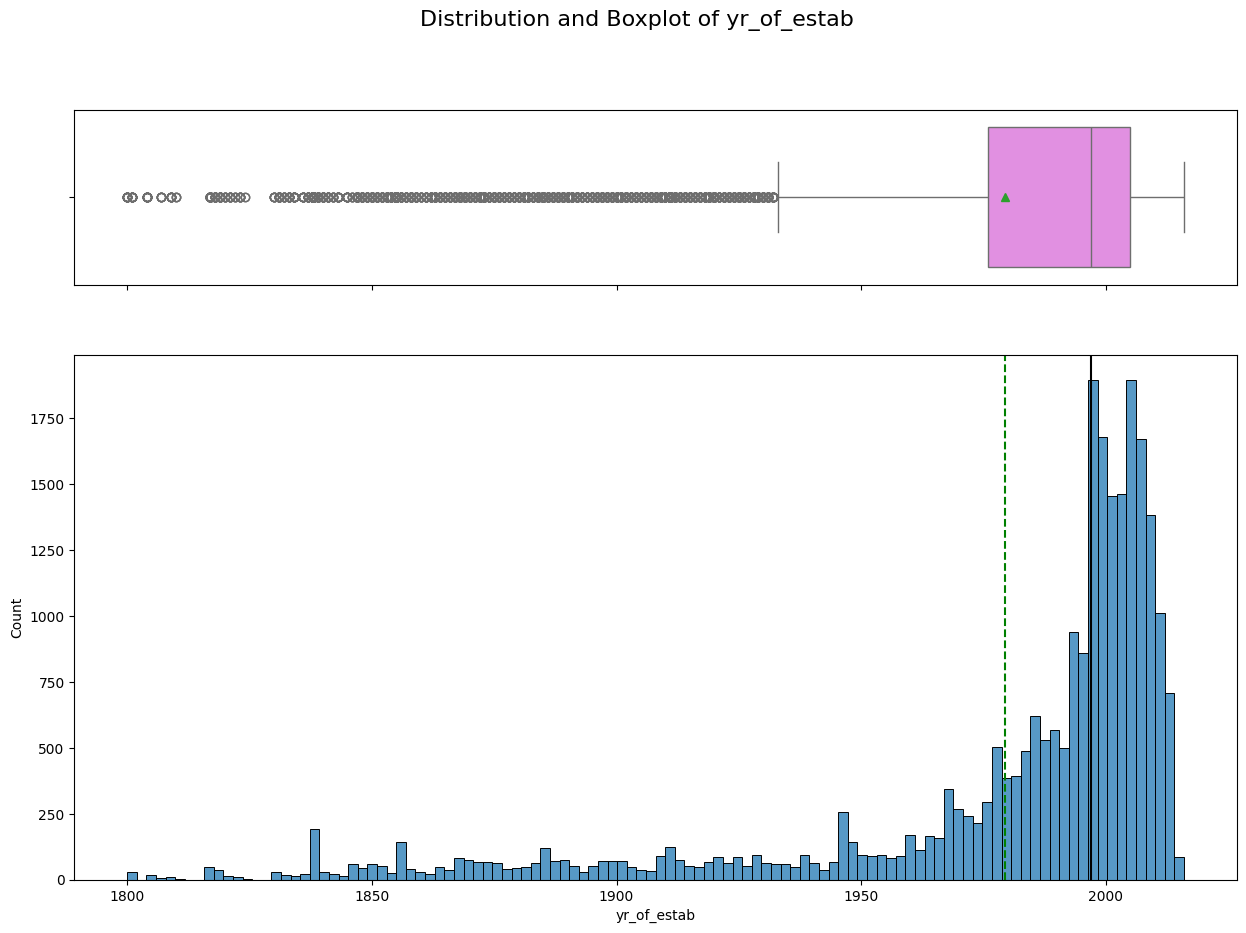

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64


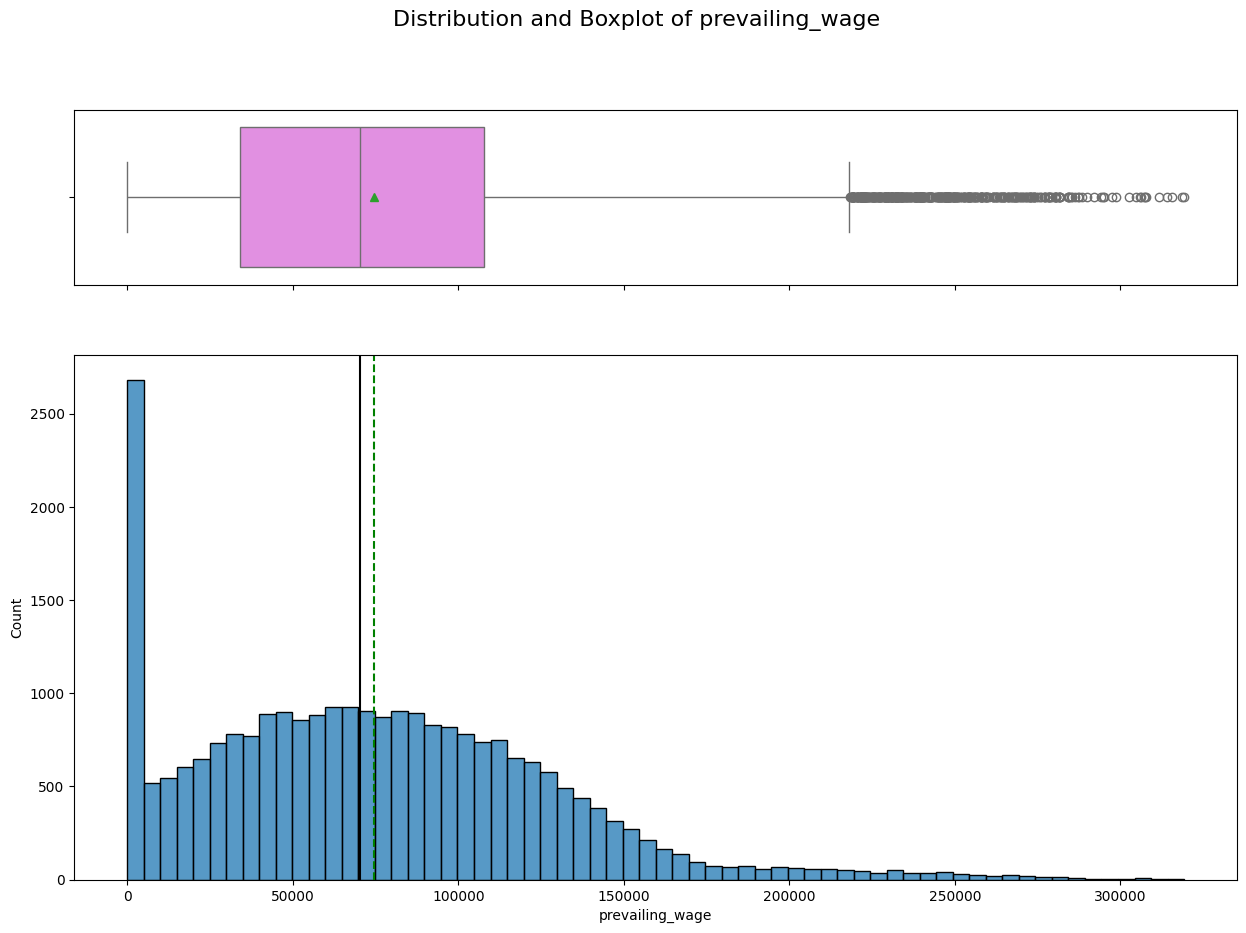

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


In [ ]:
for col in numerical_cols:
    histogram_boxplot(df, col)
    print(df[col].describe())


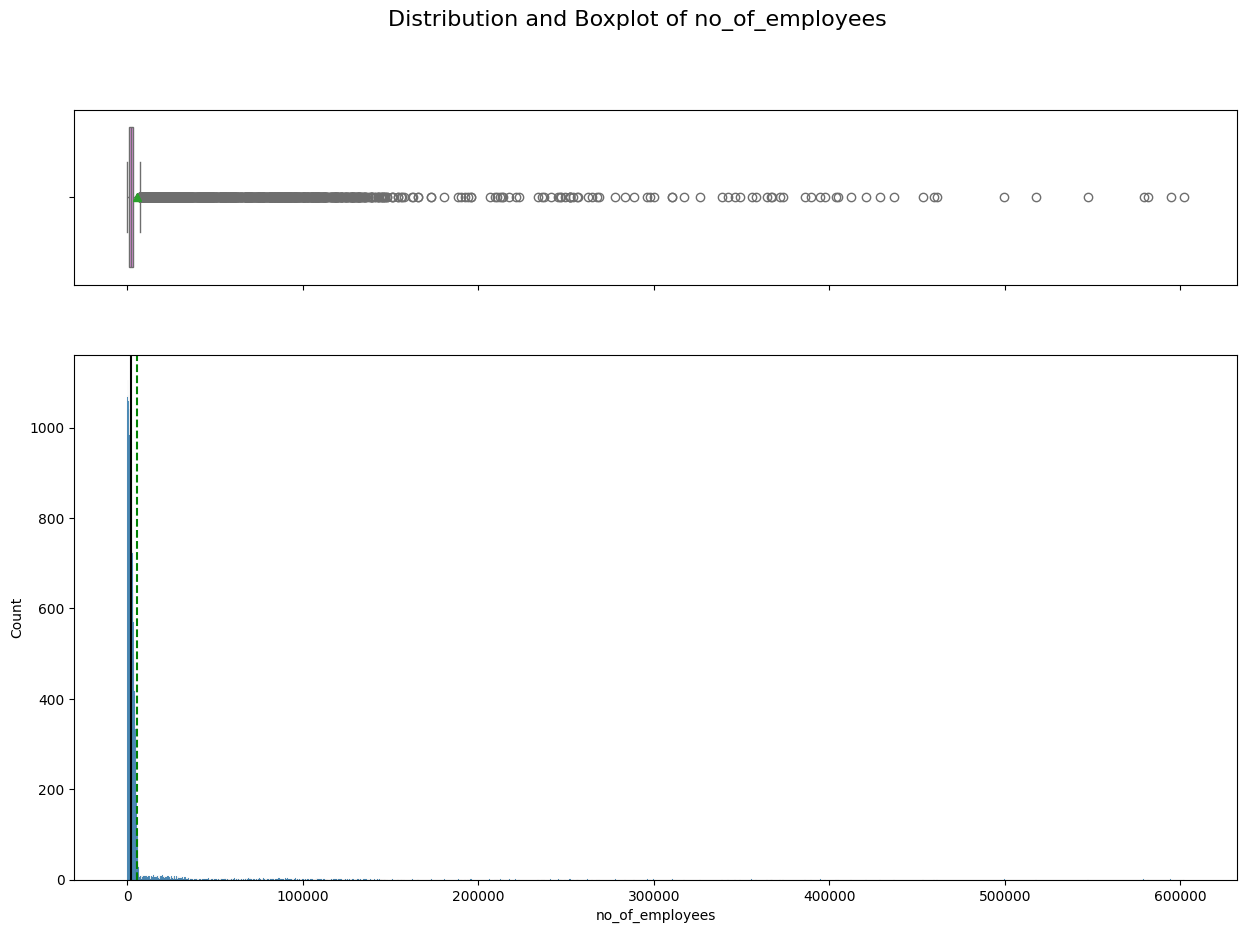

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64


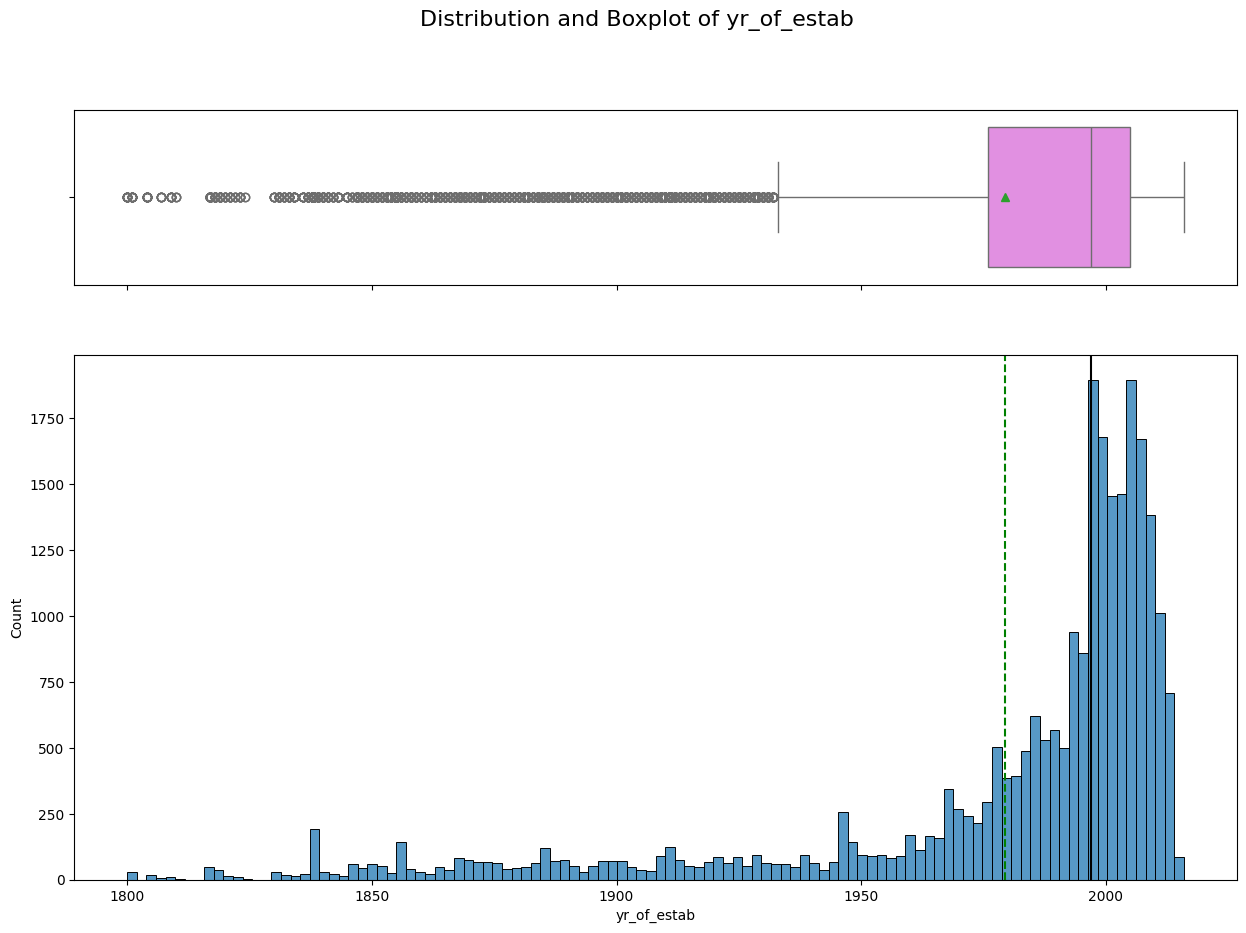

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64


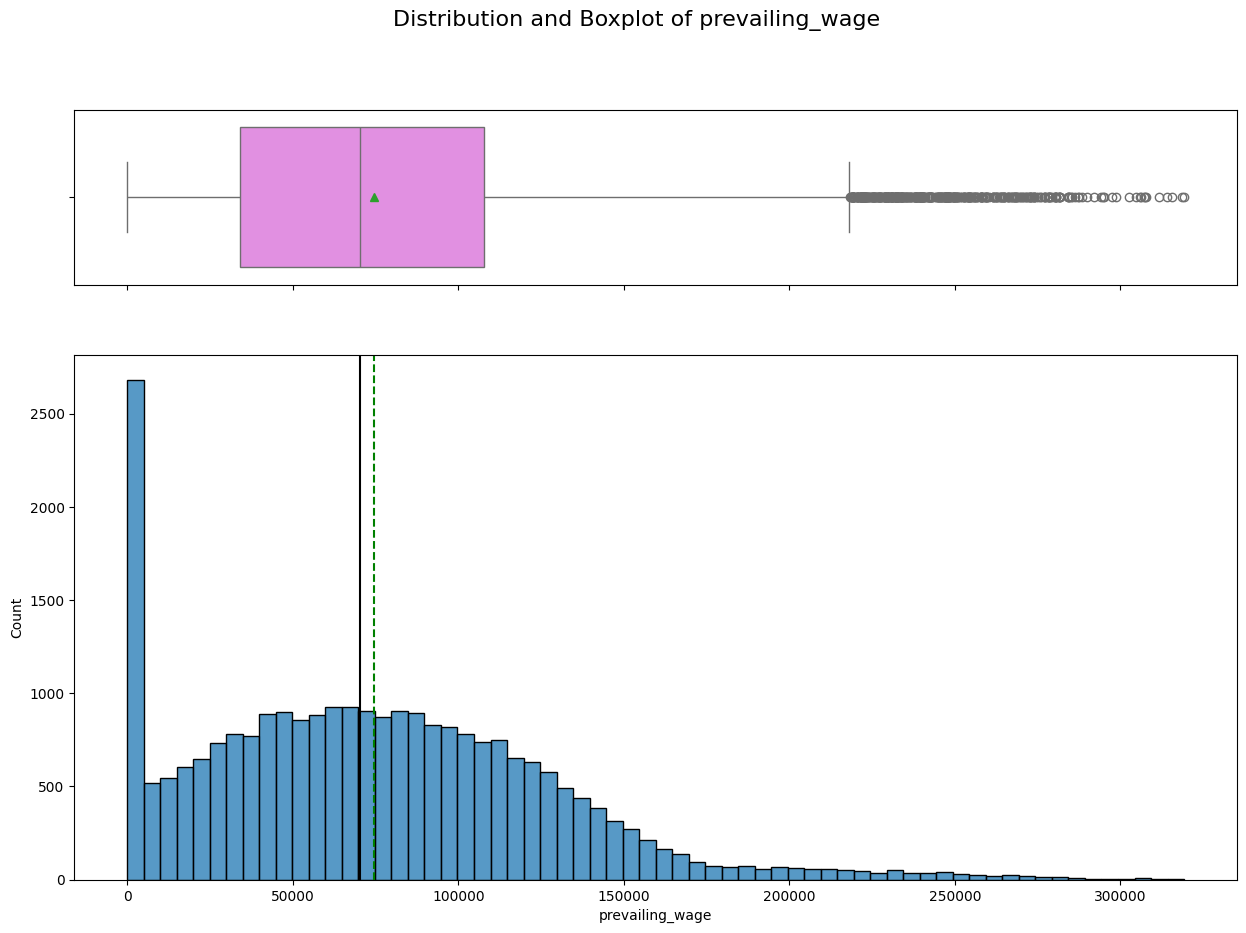

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create a figure with two subplots, sharing the x-axis.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    # Set a super title for the entire figure.
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    # Create a boxplot in the first subplot (ax_box2) to visualize central tendency and outliers.
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    # Create a histogram in the second subplot (ax_hist2) to visualize distribution.
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    # Add a vertical line for the mean of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    # Add a vertical line for the median of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show() # Display the plot


import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    histogram_boxplot(df, col)
    print(df[col].describe())

## Outlier Detection with IQR Rule

Identify outliers in each numerical column using the Interquartile Range (IQR) rule.

In [ ]:
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print("\n")

for col in numerical_cols:
    iqr_outliers(df, col)

Column: no_of_employees
  Number of outliers: 1556
  Percentage of outliers: 6.11%
  Lower Bound: -2701.00, Upper Bound: 7227.00


Column: yr_of_estab
  Number of outliers: 3260
  Percentage of outliers: 12.79%
  Lower Bound: 1932.50, Upper Bound: 2048.50


Column: prevailing_wage
  Number of outliers: 427
  Percentage of outliers: 1.68%
  Lower Bound: -76564.57, Upper Bound: 218315.56




## Outlier Detection with Z-score Method

Identify outliers in each numerical column using the Z-score method.

Identify outliers based on a threshold (typically 3 standard deviations from the mean)



In [ ]:
from scipy.stats import zscore

def zscore_outliers(df, column, threshold=3):
    # Calculate the absolute Z-score for the column
    z_scores = np.abs(zscore(df[column]))

    # Identify outliers where the absolute Z-score is greater than the threshold
    outliers = df[z_scores > threshold]

    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Z-score threshold: {threshold}")
    print("\n")

for col in numerical_cols:
    zscore_outliers(df, col)

Column: no_of_employees
  Number of outliers: 429
  Percentage of outliers: 1.68%
  Z-score threshold: 3


Column: yr_of_estab
  Number of outliers: 695
  Percentage of outliers: 2.73%
  Z-score threshold: 3


Column: prevailing_wage
  Number of outliers: 294
  Percentage of outliers: 1.15%
  Z-score threshold: 3




## Summary:

The task was to identify and summarize outliers in the numerical columns of the `df` DataFrame (`no_of_employees`, `yr_of_estab`, and `prevailing_wage`) using boxplots, the Interquartile Range (IQR) rule, and the Z-score method.

The analysis successfully identified and characterized outliers for each numerical column using the three specified methods. Boxplots provided a visual confirmation of skewed distributions and extreme values. The IQR rule identified a broader set of outliers, particularly in `yr_of_estab` due to its fixed lower bound. The Z-score method, being more sensitive to the distribution's mean and standard deviation, consistently identified a smaller, more extreme subset of outliers across all columns. The findings indicate that all three columns exhibit outliers, with `no_of_employees` and `prevailing_wage` showing significant high-side outliers, and `yr_of_estab` displaying low-side outliers corresponding to older establishments.

### Data Analysis Key Findings
*   **`no_of_employees`**:
    *   Boxplot analysis revealed significant high-side outliers, with a maximum value of 602,069 employees compared to a 75th percentile of 3,504, indicating a highly right-skewed distribution.
    *   The IQR method identified 1,556 outliers (6.11% of the data), all above the upper bound of 7,227.00.
    *   The Z-score method (threshold=3) detected 429 outliers (1.68% of the data), a substantially smaller number than the IQR method.
*   **`yr_of_estab`**:
    *   Boxplot visualization showed low-side outliers, with establishments dating back to 1800, significantly older than the 25th percentile of 1976.
    *   The IQR method found 3,260 outliers (12.79% of the data), primarily representing companies established before the lower bound of 1932.50.
    *   The Z-score method (threshold=3) identified 695 outliers (2.73% of the data), fewer than the IQR method.
*   **`prevailing_wage`**:
    *   Boxplot analysis indicated outliers on both ends, more pronounced on the higher side. The maximum wage was \$319,210.27, well above the 75th percentile of \$107,735.51, suggesting a right-skewed distribution.
    *   The IQR method identified 427 outliers (1.68% of the data), mostly above the upper bound of \$218,315.56.
    *   The Z-score method (threshold=3) detected 294 outliers (1.15% of the data), a more conservative count compared to the IQR method.
*   **Method Comparison**: The Z-score method consistently identified fewer outliers than the IQR method across all numerical columns, suggesting it is a more conservative approach in this dataset, particularly given the skewed distributions.

### Insights or Next Steps
*   The presence of outliers, especially in `no_of_employees` and `prevailing_wage`, indicates potential for significant skewness. Depending on the downstream analysis, these outliers may require specific handling such as capping, transformation, or removal to ensure model robustness.
*   Further investigation into the identified outliers could reveal valuable insights. For instance, the very old `yr_of_estab` outliers might represent historically significant companies, while high `no_of_employees` or `prevailing_wage` outliers could correspond to major corporations or specialized roles, which should be analyzed for their unique impact rather than simply removed as errors.


# Data Preparation for modeling

## Implement Outlier Treatment
Apply log transformation to the 'no_of_employees', 'yr_of_estab', and 'prevailing_wage' columns to address skewed distributions and extreme values.


To apply logarithmic transformation to the specified numerical columns and then visualize their distributions to assess the impact of the transformation use `np.log()` for each column and then call the `histogram_boxplot` function.




--- Visualizing transformed column: no_of_employees ---


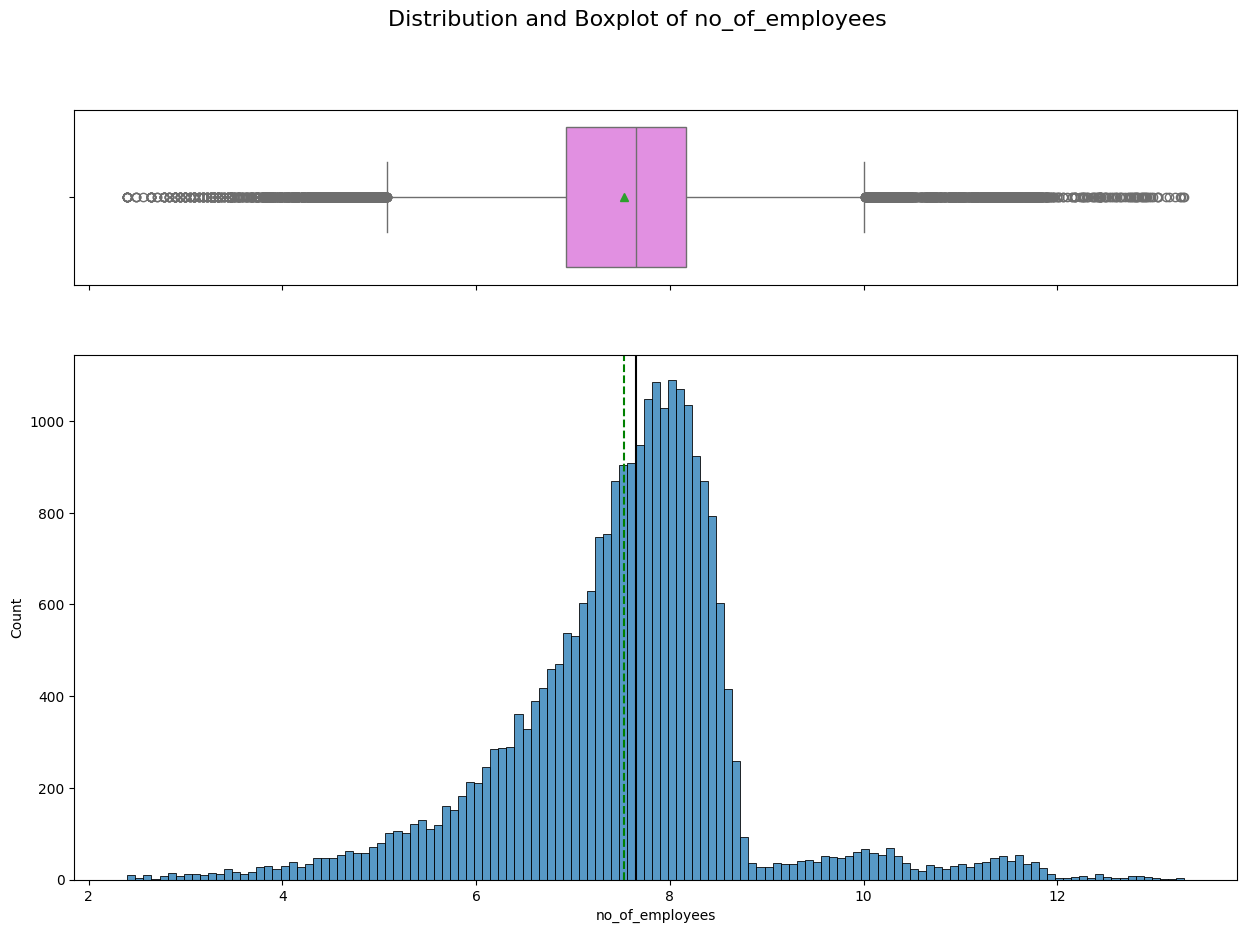

count    25480.000000
mean         7.531175
std          1.263030
min          2.397895
25%          6.929517
50%          7.653969
75%          8.161660
max         13.308127
Name: no_of_employees, dtype: float64

--- Visualizing transformed column: yr_of_estab ---


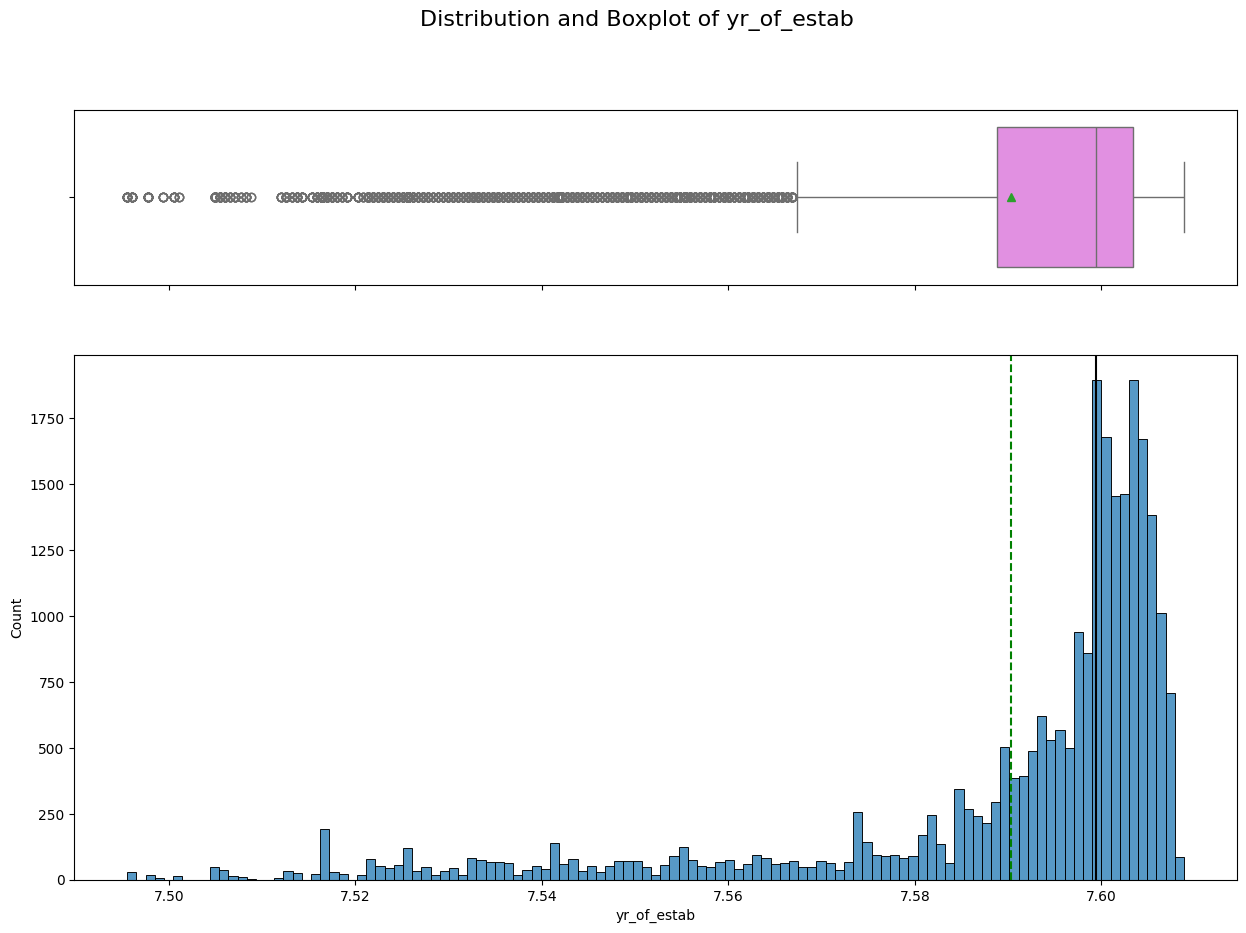

count    25480.000000
mean         7.590318
std          0.021895
min          7.495542
25%          7.588830
50%          7.599401
75%          7.603399
max          7.608871
Name: yr_of_estab, dtype: float64

--- Visualizing transformed column: prevailing_wage ---


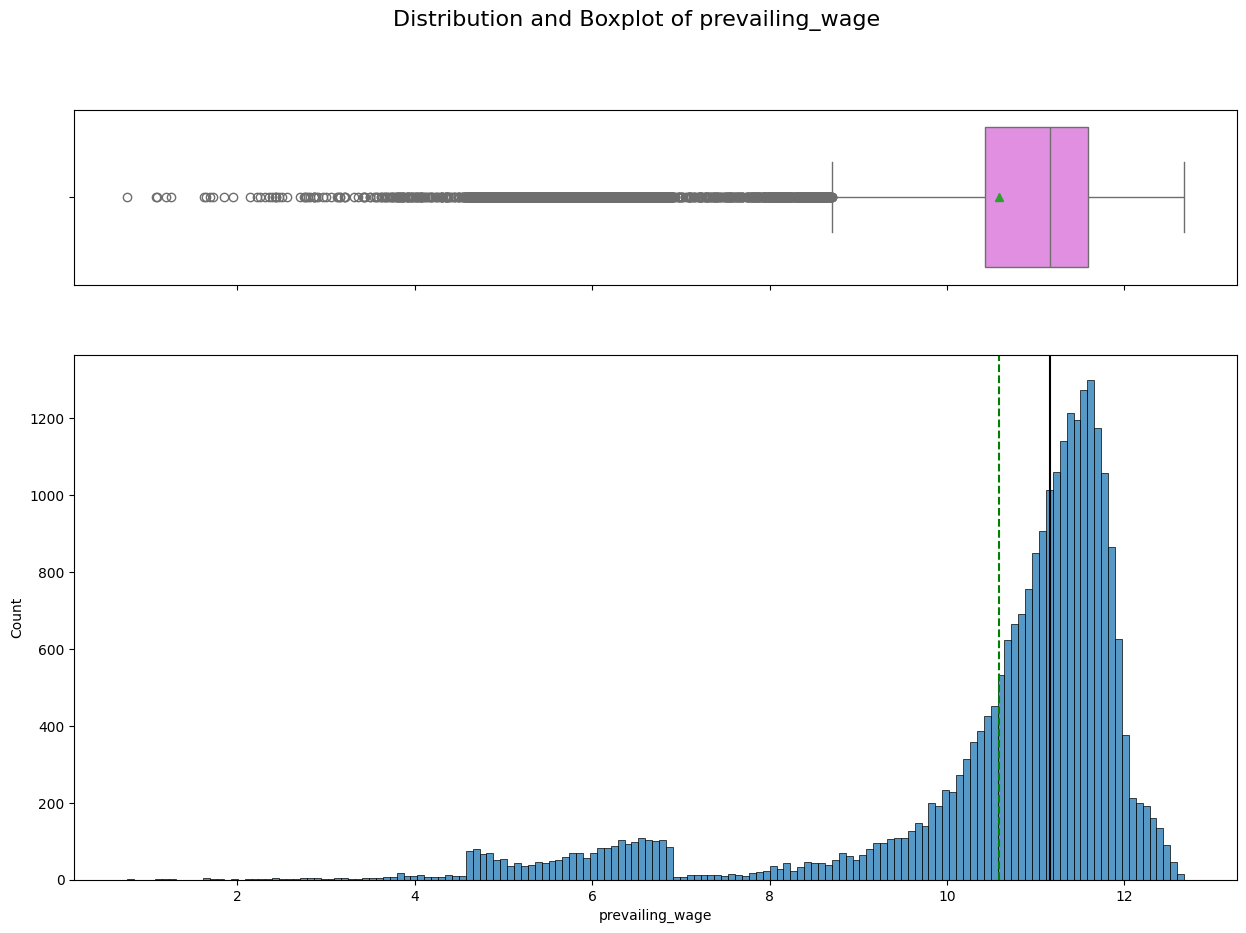

count    25480.000000
mean        10.583921
std          1.736870
min          0.759263
25%         10.434571
50%         11.160644
75%         11.587435
max         12.673605
Name: prevailing_wage, dtype: float64


In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    plt.show()


# Apply log transformation to the specified columns
df['no_of_employees'] = np.log(df['no_of_employees'])
df['yr_of_estab'] = np.log(df['yr_of_estab'])
df['prevailing_wage'] = np.log(df['prevailing_wage'])

# Visualize the transformed distributions
for col in ['no_of_employees', 'yr_of_estab', 'prevailing_wage']:
    print(f"\n--- Visualizing transformed column: {col} ---")
    histogram_boxplot(df, col)
    print(df[col].describe())

## Finalize Categorical Encoding
Ensure all remaining nominal categorical features are one-hot encoded and verify any ordinal features are correctly mapped.


Identify all categorical columns that still need to be encoded in the `df_final` DataFrame. Based on the previous steps and the prompt, `unit_of_wage` is the primary remaining nominal categorical feature. Use `pd.get_dummies` to one-hot encode this column, adding the new columns to `df_final` and dropping the original `unit_of_wage` column.



In [ ]:
# Identify remaining categorical columns in df_final
# The prompt mentions unit_of_wage is likely the only one, but let's confirm programmatically
remaining_categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
print(f"Remaining categorical columns to encode: {remaining_categorical_cols}")

# Apply one-hot encoding to remaining categorical columns
df_final = pd.get_dummies(df_final, columns=remaining_categorical_cols, drop_first=True)

# Display the first few rows of the updated df_final DataFrame
print("\nFirst 5 rows of df_final after encoding:")
print(df_final.head())

# Display its information to confirm the encoding
print("\nDataFrame info after encoding:")
df_final.info()

Remaining categorical columns to encode: ['unit_of_wage']

First 5 rows of df_final after encoding:
   has_job_experience  requires_job_training  no_of_employees  yr_of_estab  \
0                   0                      0            14513         2007   
1                   1                      0             2412         2002   
2                   0                      1            44444         2008   
3                   0                      0               98         1897   
4                   1                      0             1082         2005   

   prevailing_wage  full_time_position  case_status  continent_Africa  \
0         592.2029                   1            0             False   
1       83425.6500                   1            1             False   
2      122996.8600                   1            0             False   
3       83434.0300                   1            0             False   
4      149907.3900                   1            1              T

## Feature Scaling
Apply appropriate scaling (e.g., StandardScaler or MinMaxScaler) to all numerical features to normalize their ranges, which can be beneficial for many machine learning algorithms.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
columns_to_scale = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply scaling to the identified columns in df_final
df_final[columns_to_scale] = scaler.fit_transform(df_final[columns_to_scale])

# Display the first few rows of the updated df_final DataFrame
print("\nFirst 5 rows of df_final after scaling numerical columns:")
print(df_final.head())

# Display descriptive statistics of the scaled columns to verify transformation
print("\nDescriptive statistics of scaled numerical columns:")
print(df_final[columns_to_scale].describe())


First 5 rows of df_final after scaling numerical columns:
   has_job_experience  requires_job_training  no_of_employees  yr_of_estab  \
0                   0                      0         0.386665     0.651230   
1                   1                      0        -0.142284     0.533211   
2                   0                      1         1.694983     0.674834   
3                   0                      0        -0.243431    -1.945186   
4                   1                      0        -0.200419     0.604022   

   prevailing_wage  full_time_position  case_status  continent_Africa  \
0        -1.398537                   1            0             False   
1         0.169835                   1            1             False   
2         0.919079                   1            0             False   
3         0.169994                   1            0             False   
4         1.428604                   1            1              True   

   continent_Asia  continent_Euro

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
df_final.describe()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status
count,25480.000000,25480.000000,2.548000e+04,2.548000e+04,2.548000e+04,25480.000000,25480.000000
mean,0.580926,0.115973,5.716690e-18,4.983280e-16,8.226456e-17,0.893760,0.667896
std,0.493417,0.320199,1.000020e+00,1.000020e+00,1.000020e+00,0.308151,0.470977
min,0.000000,0.000000,-2.472341e-01,-4.234752e+00,-1.409710e+00,0.000000,0.000000
25%,0.000000,0.000000,-2.030421e-01,-8.048722e-02,-7.656993e-01,1.000000,0.000000
50%,1.000000,0.000000,-1.555281e-01,4.151921e-01,-7.853095e-02,1.000000,1.000000
75%,1.000000,0.000000,-9.455107e-02,6.040224e-01,6.301194e-01,1.000000,1.000000
max,1.000000,1.000000,2.606940e+01,8.636639e-01,4.634193e+00,1.000000,1.000000


In [ ]:
data = df_final.copy()

In [ ]:
data.describe()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status
count,25480.000000,25480.000000,2.548000e+04,2.548000e+04,2.548000e+04,25480.000000,25480.000000
mean,0.580926,0.115973,5.716690e-18,4.983280e-16,8.226456e-17,0.893760,0.667896
std,0.493417,0.320199,1.000020e+00,1.000020e+00,1.000020e+00,0.308151,0.470977
min,0.000000,0.000000,-2.472341e-01,-4.234752e+00,-1.409710e+00,0.000000,0.000000
25%,0.000000,0.000000,-2.030421e-01,-8.048722e-02,-7.656993e-01,1.000000,0.000000
50%,1.000000,0.000000,-1.555281e-01,4.151921e-01,-7.853095e-02,1.000000,1.000000
75%,1.000000,0.000000,-9.455107e-02,6.040224e-01,6.301194e-01,1.000000,1.000000
max,1.000000,1.000000,2.606940e+01,8.636639e-01,4.634193e+00,1.000000,1.000000


In [ ]:
# Separate features (X) and target variable (y) from the data DataFrame
X = data.drop(['case_status'], axis=1)
y = data["case_status"]

# The X DataFrame should already be fully numerical after previous encoding steps
# X = pd.get_dummies(X, drop_first=True) # This line is redundant if X is already fully numerical

# Split data into training (70%) and a temporary set (30%) for further splitting
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Split the temporary set (30%) into validation (15% of total) and test (15% of total) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 24)
Shape of Validation set :  (3822, 24)
Shape of test set :  (3822, 24)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667713
0    0.332287
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer = metrics.make_scorer(metrics.f1_score)

### Model building with Original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train) ## Complete the code to fit the model on original training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7750831699331684
Random forest: 0.8027408867937542
GBM: 0.8225489911785724
Adaboost: 0.8174503207776163
Xgboost: 0.8086372281473727
dtree: 0.7402451708515632

Validation Performance:

Bagging: 0.7694728560188828
Random forest: 0.7997737556561086
GBM: 0.822323879231473
Adaboost: 0.816414686825054
Xgboost: 0.8133900499352691
dtree: 0.7490196078431373


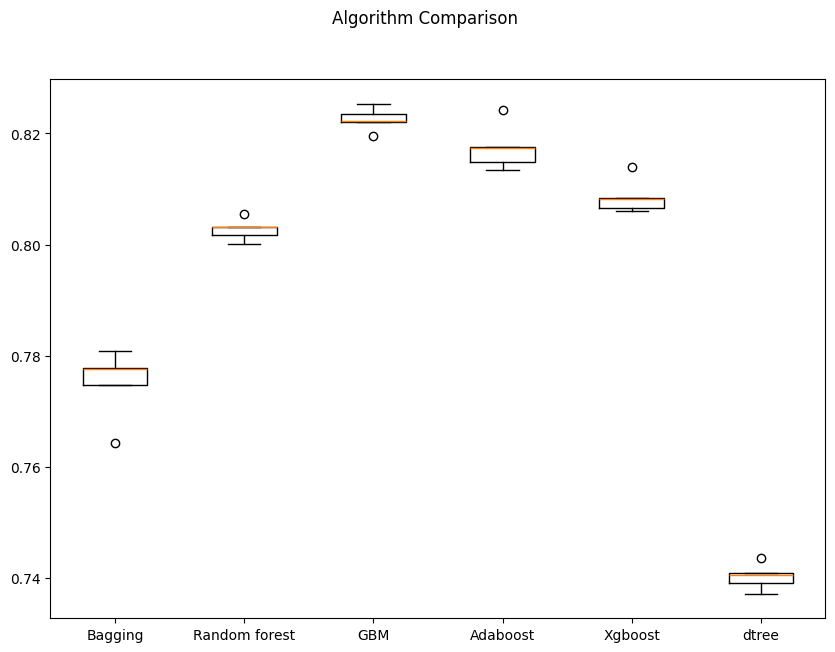

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 24)
After OverSampling, the shape of train_y: (23826,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over) ## Complete the code to fit the model on oversampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7304240921500413
Random forest: 0.7705631441787375
GBM: 0.7358618920122737
Adaboost: 0.7121505067806162
Xgboost: 0.7613337397573562
dtree: 0.6991388920303752

Validation Performance:

Bagging: 0.7423021285389543
Random forest: 0.774515678050729
GBM: 0.773889912011459
Adaboost: 0.7648864333947207
Xgboost: 0.7845544554455446
dtree: 0.7315778730353133


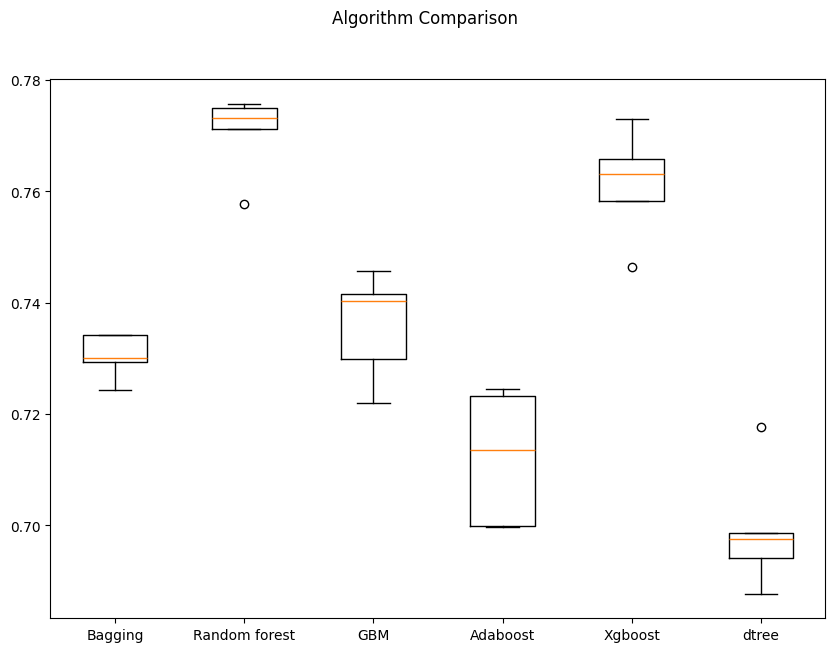

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 24)
After UnderSampling, the shape of train_y: (11846,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6518178419424709
Random forest: 0.6885782208302308
GBM: 0.7133669782712595
Adaboost: 0.6979378649645342
Xgboost: 0.6894162671933962
dtree: 0.6220292399039022

Validation Performance:

Bagging: 0.6859578286227007
Random forest: 0.7335610589239966
GBM: 0.7620046131264416
Adaboost: 0.7651671481634338
Xgboost: 0.7513672696676483
dtree: 0.6795400303753526


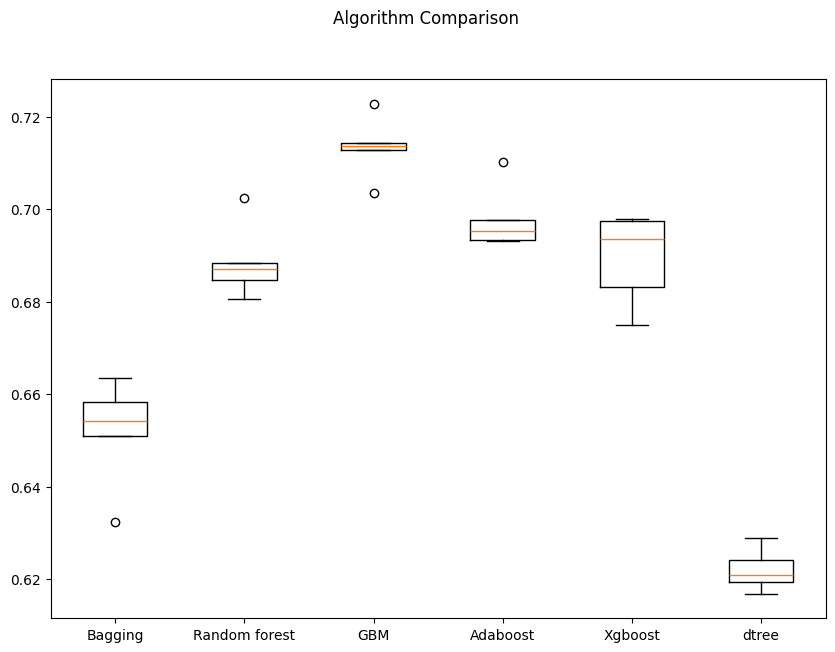

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

### Tuning AdaBoost using Oversampled data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data

In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators
    "learning_rate": [1.0, 0.5, 0.1, 0.01], ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on oversampled data

CPU times: user 11min 1s, sys: 483 ms, total: 11min 1s
Wall time: 11min 7s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7436140478507586:


In [ ]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   n_estimators=125, random_state=1)

In [ ]:
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   n_estimators=125, random_state=1)

In [ ]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.757114,0.771006,0.750163,0.760442


In [ ]:
## Complete the code to check the model performance for validation data.
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.76685,0.803366,0.784683


### Tuning Random forest using Undersampled data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

In [ ]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators.
    "min_samples_leaf": [1, 2, 4, 5, 10], ## Complete the code to set the minimum number of samples in the leaf node.
    "max_features": ['sqrt', 'log2', None, 0.3, 0.5], ## Complete the code to set the maximum number of features.
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0], ## Complete the code to set the maximum number of samples.
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

CPU times: user 7min 10s, sys: 435 ms, total: 7min 11s
Wall time: 7min 14s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', None,
                                                         0.3, 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'min_samples_leaf': 10, 'max_samples': 0.6, 'max_features': 'log2'} with CV score=0.7188319582956451:


In [ ]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf

RandomForestClassifier(max_features='log2', max_samples=0.6,
                       min_samples_leaf=10, n_estimators=125, random_state=1)

In [ ]:
tuned_rf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', max_samples=0.6,
                       min_samples_leaf=10, n_estimators=125, random_state=1)

In [ ]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.745399,0.780517,0.729295,0.754037


In [ ]:
## Complete the code to print the model performance on the validation data.
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.759013,0.810799,0.784052


### Tuning with Gradient boosting with Oversampled data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 125, 150, 175
* Typically, higher values lead to better performance, but they also increase training time
* Use 150-250 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

In [ ]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={
    "n_estimators": [100, 125, 150, 175], ## Complete the code to set the number of estimators.
    "learning_rate": [0.1, 0.05, 0.01, 0.005], ## Complete the code to set the learning rate.
    "subsample":[0.7, 0.8, 0.9, 1.0], ## Complete the code to set the value for subsample.
    "max_features":['sqrt', 'log2', 0.3, 0.5] ## Complete the code to set the value for max_features.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 8min 57s, sys: 695 ms, total: 8min 58s
Wall time: 9min 3s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 125, 150, 175],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 175, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.7392818969479229:


In [ ]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(max_features=0.5, n_estimators=175, random_state=1,
                           subsample=0.9)

In [ ]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.753882,0.757744,0.751937,0.754829


In [ ]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.711669,0.746082,0.807464,0.77556


### [OPTIONAL] Tuning XGBoost using Oversampled data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={
    'n_estimators':[50, 75, 100, 125], ## Complete the code to set the number of estimators.
    'subsample':[0.5, 0.7, 0.8, 1.0], ## Complete the code to set the subsample.
    'gamma':[0, 1, 3, 5, 8], ## Complete the code to set the gamma.
    'colsample_bytree':[0.3, 0.5, 0.7, 1.0], ## Complete the code to set the value for colsample_bytree.
    'colsample_bylevel':[0.3, 0.5, 0.7, 1.0], ## Complete the code to set the value for colsample_bylevel.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on oversampled data

CPU times: user 1min 55s, sys: 640 ms, total: 1min 56s
Wall time: 1min 9s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.3, 0.5, 0.7,
                                                              1.0],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'gamma': [0, 1, 3, 5, 8],
                                        'n_estimators': [50, 75, 100, 125],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 125, 'gamma': 0, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.3} with CV score=0.7531639035093521:


In [ ]:
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.832788,0.838915,0.828759,0.833806


In [ ]:
## Complete the code to print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.709053,0.766458,0.791262,0.778662


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance Summary and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
     "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.753882,0.832788,0.757114,0.745399
Recall,0.757744,0.838915,0.771006,0.780517
Precision,0.751937,0.828759,0.750163,0.729295
F1,0.754829,0.833806,0.760442,0.754037


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
   "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.711669,0.709053,0.718995,0.720827
Recall,0.746082,0.766458,0.766850,0.759013
Precision,0.807464,0.791262,0.803366,0.810799
F1,0.775560,0.778662,0.784683,0.784052


In [ ]:
# selecting the final model by uncommenting the line corresponding to the final model chosen

# final_model = tuned_gbm ## uncomment this line if the final model chosen is Gradient Boosting
# final_model = tuned_xgb ## uncomment this line if the final model chosen is XGBoost
# final_model = tuned_ada ## uncomment this line if the final model chosen is AdaBoost
# final_model = tuned_rf ## uncomment this line if the final model chosen is Random Forest
final_model = tuned_ada ## uncomment this line if the final model chosen is AdaBoost

In [ ]:
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.716117,0.758715,0.805071,0.781206


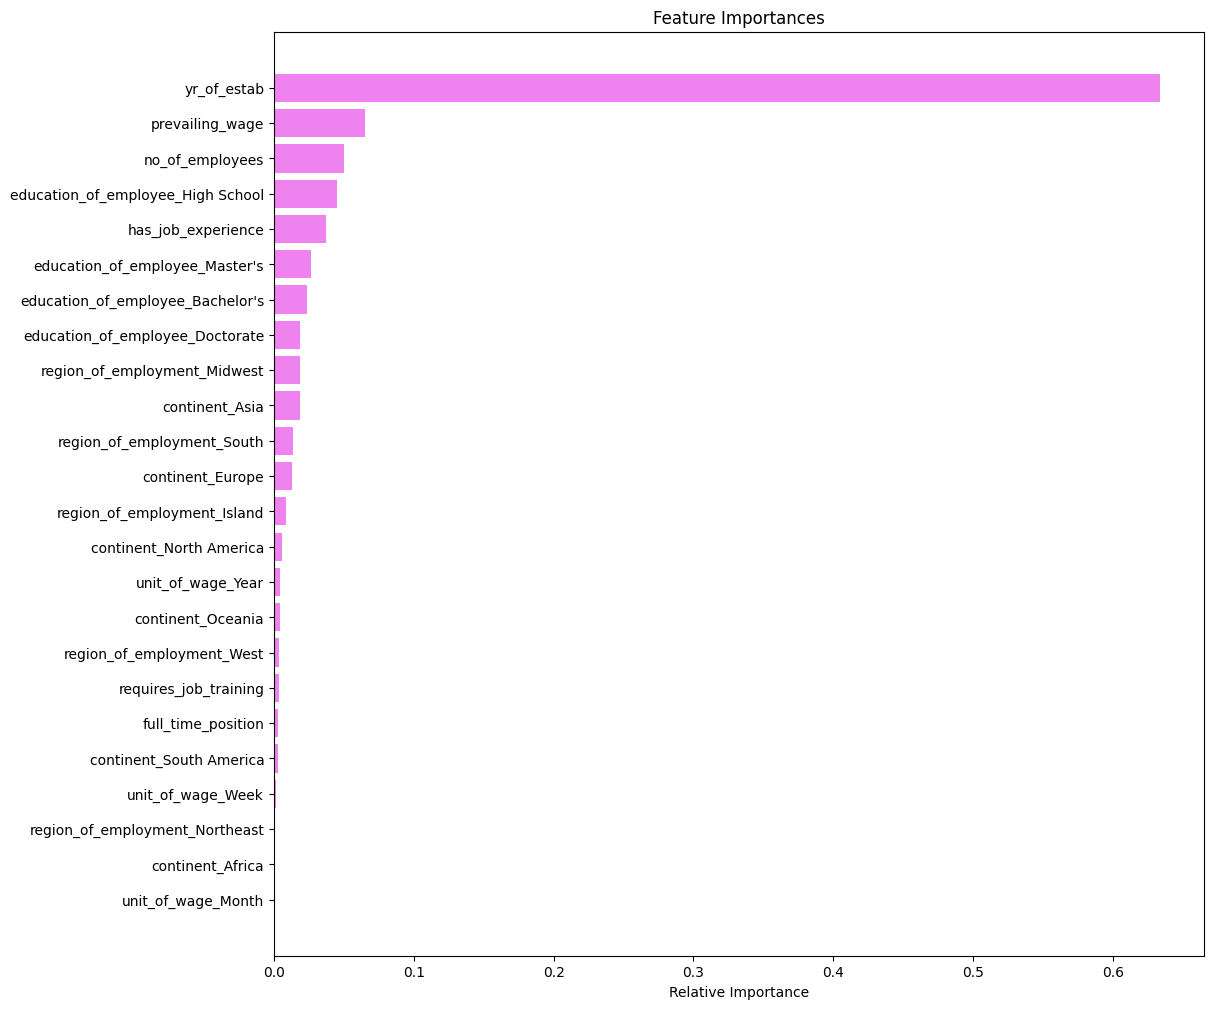

In [ ]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Performance metrics on the test set:
   Accuracy    Recall  Precision        F1
0  0.716117  0.758715   0.805071  0.781206


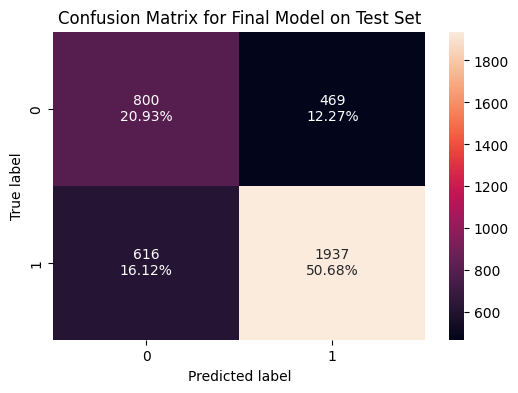

In [ ]:
print("Performance metrics on the test set:")
print(test)

confusion_matrix_sklearn(final_model, X_test, y_test)
plt.title("Confusion Matrix for Final Model on Test Set")
plt.show()

## Actionable Insights and Recommendations

Extract feature importances from the final selected model (tuned AdaBoost). Translate these insights into actionable recommendations for EasyVisa, focusing on factors significantly influencing visa certification and denial, and suitable applicant profiles.


## Actionable Insights and Recommendations for EasyVisa

Based on the feature importances from the tuned AdaBoost model and insights from the Exploratory Data Analysis, we can provide the following actionable recommendations to EasyVisa:

### Key Drivers of Visa Certification (from Feature Importance Plot):

1.  **`prevailing_wage`**: This is by far the most significant factor influencing visa status, as indicated by its highest relative importance (over 0.6). A higher prevailing wage significantly increases the chances of certification.
2.  **`no_of_employees`**: The number of employees in the employer's company also shows a notable influence, suggesting that larger companies might have a higher success rate or different application patterns.
3.  **`education_of_employee_Master's`** and **`education_of_employee_Doctorate`**: These educational qualifications are important positive indicators, with Master's being particularly impactful. Higher education correlates with higher certification rates, as observed in the bivariate analysis.
4.  **`has_job_experience`**: Having job experience is a positive predictor for visa certification.
5.  **`yr_of_estab`**: The year of establishment of the employer's company has some influence.

### Actionable Recommendations for EasyVisa:

1.  **Prioritize Applicants with High Prevailing Wages:**
    *   **Recommendation**: Advise applicants to target job positions with prevailing wages significantly above the median or average for their region and occupation. EasyVisa should highlight this as a critical success factor.
    *   **Rationale**: The `prevailing_wage` is the strongest predictor of certification. Applications with higher wages are more likely to meet regulatory scrutiny and demonstrate a genuine need for foreign talent without undercutting local labor.
    *   **Suitable Profile**: Applicants targeting roles with prevailing wages in the top quartile of their respective fields.

2.  **Focus on Highly Educated Candidates:**
    *   **Recommendation**: Encourage and prioritize applicants with Master's or Doctorate degrees. EasyVisa can tailor its marketing and services to attract these highly qualified individuals.
    *   **Rationale**: The bivariate analysis showed a monotonic increase in certification rates with higher education levels. `education_of_employee_Master's` and `education_of_employee_Doctorate` are key features in the model, indicating a strong positive impact.
    *   **Suitable Profile**: Candidates holding Master's or Doctorate degrees.

3.  **Advise on Prior Job Experience:**
    *   **Recommendation**: Stress the importance of prior job experience. For applicants without experience, EasyVisa could recommend gaining relevant experience before applying or focus on roles specifically designed for new graduates where experience is less critical.
    *   **Rationale**: `has_job_experience` is a positive predictor. Experienced candidates are generally perceived as more competitive and less risky.
    *   **Suitable Profile**: Applicants with demonstrated professional experience in their field.

4.  **Consider Employer Size and Stability:**
    *   **Recommendation**: Guide applicants towards larger, more established companies. EasyVisa can develop partnerships with such employers or provide insights into their historical visa success rates.
    *   **Rationale**: `no_of_employees` and `yr_of_estab` have predictive power. Larger, older companies may have more robust HR processes, a track record of hiring foreign workers, or a greater capacity to meet visa requirements.

5.  **Strategic Region of Employment and Full-Time Positions:**
    *   **Recommendation**: While `region_of_employment` and `full_time_position` show lower direct importance in the final model, previous EDA suggested that certain regions (like Northeast, South, West) have a higher volume of applications. Emphasize full-time positions.
    *   **Rationale**: Full-time positions are generally preferred and simplify the application process. Regional variations might influence specific demand.
    *   **Suitable Profile**: Applicants seeking full-time roles in high-demand regions.

### Overall Suitable Applicant Profile for EasyVisa:

EasyVisa should primarily target and recommend applicants who:

*   **Have a Master's or Doctorate degree.**
*   **Possess relevant prior job experience.**
*   **Are seeking full-time positions with competitive prevailing wages (above average for their role and region).**
*   **Are applying to established companies with a substantial number of employees.**

By focusing on these factors, EasyVisa can significantly enhance the likelihood of visa certification for its clients, streamlining their processes and improving success rates.

## Summary:

### Data Analysis Key Findings

*   The final tuned AdaBoost model achieved the following performance on the unseen test set:
    *   Accuracy: 0.716117
    *   Recall: 0.758715
    *   Precision: 0.805071
    *   F1-score: 0.781206
*   The most significant factor influencing visa certification was `prevailing_wage`, indicating that higher wages strongly correlate with higher success rates.
*   Other important positive predictors for visa certification included `no_of_employees` (employer's company size), `education_of_employee_Master's` and `education_of_employee_Doctorate` (higher education levels), and `has_job_experience`.
*   The `yr_of_estab` (year of establishment of the employer's company) also showed some influence on certification outcomes.

### Insights or Next Steps

*   EasyVisa should strategically prioritize applicants with higher education (Master's or Doctorate), significant job experience, and those applying for roles with competitive prevailing wages in established companies, as these factors are highly predictive of visa certification.
*   Further analysis could explore the interaction effects between the most influential features (e.g., how prevailing wage interacts with education level) to refine applicant profiling and guidance even more precisely.


<font size=6 color='blue'>Power Ahead</font>
___